## 🧾 Introduction

This notebook explores the Diabetes 130-US Hospitals dataset from the UCI Machine Learning Repository. The primary goal is to analyze patient readmission patterns and identify key predictors using data analytics and machine learning.

Dataset Source: UCI ML Repository (ID: 296)  
Domain: Healthcare  
Focus: 30-day hospital readmission for diabetic 

## 📦 Dataset Import

We use the `ucimlrepo` Python package to fetch the dataset directly from the UCI ML Repository.

In [12]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()

# import dataset
diabetes = fetch_ucirepo(id=296)



-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

C:\Users\raiag\anaconda3\envs\enron_exams\lib\site-packages\ucimlrepo\fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


In [13]:
print(type(diabetes.data))

<class 'ucimlrepo.dotdict.dotdict'>


In [14]:
import pandas as pd

---

### 🔍 3. **Data Overview**
```markdown
## 🔍 Data Overview

We convert the dataset into a Pandas DataFrame for exploration.

## 📊 Exploratory Data Analysis (EDA)

We visualize key patterns such as:
- Distribution of readmission status
- Relationship between number of medications and readmission
- Impact of admission type (e.g., emergency) on readmission rates

**Initial Data Audit**

In [15]:
df = pd.DataFrame(data=diabetes.data.original)
df.tail()
df_variables = pd.DataFrame(data=diabetes.variables)

The dataset includes:

Features: Demographics, admission details, lab results, medications

Target: Readmission status (e.g., <30 days, >30 days, or no readmission)

In [29]:
df.shape

(101766, 50)

In [32]:
df.describe(include="all")

encounter_id   patient_nbr       race  gender      age    weight  \
count   1.017660e+05  1.017660e+05      99493  101766   101766      3197   
unique           NaN           NaN          5       3       10         9   
top              NaN           NaN  Caucasian  Female  [70-80)  [75-100)   
freq             NaN           NaN      76099   54708    26068      1336   
mean    1.652016e+08  5.433040e+07        NaN     NaN      NaN       NaN   
std     1.026403e+08  3.869636e+07        NaN     NaN      NaN       NaN   
min     1.252200e+04  1.350000e+02        NaN     NaN      NaN       NaN   
25%     8.496119e+07  2.341322e+07        NaN     NaN      NaN       NaN   
50%     1.523890e+08  4.550514e+07        NaN     NaN      NaN       NaN   
75%     2.302709e+08  8.754595e+07        NaN     NaN      NaN       NaN   
max     4.438672e+08  1.895026e+08        NaN     NaN      NaN       NaN   

        admission_type_id  discharge_disposition_id  admission_source_id  \
count       101766.000000             101766.000000        101766.000000   
unique                NaN                       NaN                  NaN   
top                   NaN                       NaN                  NaN   
freq                  NaN                       NaN                  NaN   
mean             2.024006                  3.715642             5.754437   
std              1.445403                  5.280166             4.064081   
min              1.000000                  1.000000             1.000000   
25%              1.000000                  1.000000             1.000000   
50%              1.000000                  1.000000             7.000000   
75%              3.000000                  4.000000             7.000000   
max              8.000000                 28.000000            25.000000   

        time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
count      101766.000000  ...      101766  101766               101766   
unique               NaN  ...           1       4                    4   
top                  NaN  ...          No      No                   No   
freq                 NaN  ...      101766   47383               101060   
mean            4.395987  ...         NaN     NaN                  NaN   
std             2.985108  ...         NaN     NaN                  NaN   
min             1.000000  ...         NaN     NaN                  NaN   
25%             2.000000  ...         NaN     NaN                  NaN   
50%             4.000000  ...         NaN     NaN                  NaN   
75%             6.000000  ...         NaN     NaN                  NaN   
max            14.000000  ...         NaN     NaN                  NaN   

        glipizide-metformin  glimepiride-pioglitazone  \
count                101766                    101766   
unique                    2                         2   
top                      No                        No   
freq                 101753                    101765   
mean                    NaN                       NaN   
std                     NaN                       NaN   
min                     NaN                       NaN   
25%                     NaN                       NaN   
50%                     NaN                       NaN   
75%                     NaN                       NaN   
max                     NaN                       NaN   

        metformin-rosiglitazone  metformin-pioglitazone  change diabetesMed  \
count                    101766                  101766  101766      101766   
unique                        2                       2       2           2   
top                          No                      No      No         Yes   
freq                     101764                  101765   54755       78363   
mean                        NaN                     NaN     NaN         NaN   
std                         NaN                     NaN     NaN         NaN   
min                         NaN                     NaN

In [78]:
df.describe()

encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.000000          4.000000   
75%                    4.000000             7.000000          6.000000   
max                   28.000000            25.000000         14.000000   

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count       101766.000000   101766.000000    101766.000000      101766.000000   
mean            43.095641        1.339730        16.021844           0.369357   
std             19.674362        1.705807         8.127566           1.267265   
min              1.000000        0.000000         1.000000           0.000000   
25%             31.000000        0.000000        10.000000           0.000000   
50%             44.000000        1.000000        15.000000           0.000000   
75%             57.000000        2.000000        20.000000           0.000000   
max            132.000000        6.000000        81.000000          42.000000   

       number_emergency  number_inpatient  number_diagnoses  
count     101766.000000     101766.000000     101766.000000  
mean           0.197836          0.635566          7.422607  
std            0.930472          1.262863          1.933600  
min            0.000000          0.000000          1.000000  
25%            0.000000          0.000000          6.000000  
50%            0.000000          0.000000          8.000000  
75%            0.000000          1.000000          9.000000  
max           76.000000         21.000000         16.000000

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [17]:
df_variables

name     role         type demographic  \
0               encounter_id       ID                     None   
1                patient_nbr       ID                     None   
2                       race  Feature  Categorical        Race   
3                     gender  Feature  Categorical      Gender   
4                        age  Feature  Categorical         Age   
5                     weight  Feature  Categorical        None   
6          admission_type_id  Feature  Categorical        None   
7   discharge_disposition_id  Feature  Categorical        None   
8        admission_source_id  Feature  Categorical        None   
9           time_in_hospital  Feature      Integer        None   
10                payer_code  Feature  Categorical        None   
11         medical_specialty  Feature  Categorical        None   
12        num_lab_procedures  Feature      Integer        None   
13            num_procedures  Feature      Integer        None   
14           num_medications  Feature      Integer        None   
15         number_outpatient  Feature      Integer        None   
16          number_emergency  Feature      Integer        None   
17          number_inpatient  Feature      Integer        None   
18                    diag_1  Feature  Categorical        None   
19                    diag_2  Feature  Categorical        None   
20                    diag_3  Feature  Categorical        None   
21          number_diagnoses  Feature      Integer        None   
22             max_glu_serum  Feature  Categorical        None   
23                 A1Cresult  Feature  Categorical        None   
24                 metformin  Feature  Categorical        None   
25               repaglinide  Feature  Categorical        None   
26               nateglinide  Feature  Categorical        None   
27            chlorpropamide  Feature  Categorical        None   
28               glimepiride  Feature  Categorical        None   
29             acetohexamide  Feature  Categorical        None   
30                 glipizide  Feature  Categorical        None   
31                 glyburide  Feature  Categorical        None   
32               tolbutamide  Feature  Categorical        None   
33              pioglitazone  Feature  Categorical        None   
34             rosiglitazone  Feature  Categorical        None   
35                  acarbose  Feature  Categorical        None   
36                  miglitol  Feature  Categorical        None   
37              troglitazone  Feature  Categorical        None   
38                tolazamide  Feature  Categorical        None   
39                   examide  Feature  Categorical        None   
40               citoglipton  Feature  Categorical        None   
41                   insulin  Feature  Categorical        None   
42       glyburide-metformin  Feature  Categorical        None   
43       glipizide-metformin  Feature  Categorical        None   
44  glimepiride-pioglitazone  Feature  Categorical        None   
45   metformin-rosiglitazone  Feature  Categorical        None   
46    metformin-pioglitazone  Feature  Categorical        None   
47                    change  Feature  Categorical        None   
48               diabetesMed  Feature  Categorical        None   
49                readmitted   Target  Categorical        None   

                                          description units missing_values  
0                   Unique identifier of an encounter  None             no  
1                      Unique identifier of a patient  None             no  
2   Values: Caucasian, Asian, African American, Hi...  None            yes  
3           Values: male, female, and unknown/invalid  None             no  
4   Grouped in 10-year intervals: [0, 10), [10, 20...  None             no  
5                                   Weight in pounds.  None            yes  
6   Integer identifier corresponding to 9 distinct...  None             no  
7   Integer identifier corresponding to 2

In [25]:
diabetes.metadata.additional_info.variable_info

'Detailed description of all the atrributes is provided in Table 1 Beata Strack, Jonathan P. DeShazo, Chris Gennings,  Juan L. Olmo, Sebastian Ventura,  Krzysztof J. Cios, and John N. Clore, “Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records,” BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.\n\nhttp://www.hindawi.com/journals/bmri/2014/781670/'

| Feature Name               | Type     | Description                                                                                                                                                                                                 | % Missing |
|---------------------------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------|
| Encounter ID              | Numeric  | Unique identifier of an encounter                                                                                                                                                                           | 0%        |
| Patient number            | Numeric  | Unique identifier of a patient                                                                                                                                                                              | 0%        |
| Race                      | Nominal  | Values: Caucasian, Asian, African American, Hispanic, and other                                                                                                                                             | 2%        |
| Gender                    | Nominal  | Values: male, female, and unknown/invalid                                                                                                                                                                   | 0%        |
| Age                       | Nominal  | Grouped in 10-year intervals: [0, 10), [10, 20), …, [90, 100)                                                                                                                                                | 0%        |
| Weight                    | Numeric  | Weight in pounds                                                                                                                                                                                            | 97%       |
| Admission type            | Nominal  | Integer identifier corresponding to 9 distinct values, e.g., emergency, urgent, elective, newborn, and not available                                                                                        | 0%        |
| Discharge disposition     | Nominal  | Integer identifier corresponding to 29 distinct values, e.g., discharged to home, expired, and not available                                                                                                | 0%        |
| Admission source          | Nominal  | Integer identifier corresponding to 21 distinct values, e.g., physician referral, emergency room, and transfer from a hospital                                                                              | 0%        |
| Time in hospital          | Numeric  | Integer number of days between admission and discharge                                                                                                                                                      | 0%        |
| Payer code                | Nominal  | Integer identifier corresponding to 23 distinct values, e.g., Blue Cross/Blue Shield, Medicare, and self-pay                                                                                               | 52%       |
| Medical specialty         | Nominal  | Integer identifier of a specialty of the admitting physician, e.g., cardiology, internal medicine, family/general practice, and surgeon                                                                    | 53%       |
| Number of lab procedures  | Numeric  | Number of lab tests performed during the encounter                                                                                                                                                          | 0%        |
| Number of procedures      | Numeric  | Number of procedures (other than lab tests) performed during the encounter                                                                                                                                  | 0%        |
| Number of medications     | Numeric  | Number of distinct generic names administered during the encounter                                                                                                                                          | 0%        |
| Number of outpatient visits | Numeric | Number of outpatient visits of the patient in the year preceding the encounter                                                                                                                              | 0%        |
| Number of emergency visits | Numeric | Number of emergency visits of the patient in the year preceding the encounter                                                                                                                               | 0%        |
| Number of inpatient visits | Numeric | Number of inpatient visits of the patient in the year preceding the encounter                                                                                                                               | 0%        |
| Diagnosis 1               | Nominal  | Primary diagnosis (coded as first three digits of ICD9); 848 distinct values                                                                                                                                | 0%        |
| Diagnosis 2               | Nominal  | Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values                                                                                                                              | 0%        |
| Diagnosis 3               | Nominal  | Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values                                                                                                                   | 1%        |
| Number of diagnoses       | Numeric  | Number of diagnoses entered to the system                                                                                                                                                                   | 0%        |
| Glucose serum test result | Nominal  | Values: “>200,” “>300,” “normal,” and “none” if not measured                                                                                                                                                | 0%        |
| A1c test result           | Nominal  | Values: “>8” if >8%, “>7” if >7% but <8%, “normal” if <7%, and “none” if not measured                                                                                                                       | 0%        |
| Change of medications     | Nominal  | Indicates if there was a change in diabetic medications. Values: “change” and “no change”                                                                                                                   | 0%        |
| Diabetes medications      | Nominal  | Indicates if any diabetic medication was prescribed. Values: “yes” and “no”                                                                                                                                 | 0%        |
| 24 features for medications | Nominal | For 24 generic drugs, indicates dosage change. Values: “up,” “down,” “steady,” and “no”                                                                                                                     | 0%        |
| Readmitted                | Nominal  | Days to inpatient readmission. Values: “<30,” “>30,” and “No”                                                                                                                                               | 0%        |


**Missing Data Analysis**

In [57]:
missing_summary = pd.DataFrame({
    'Missing Count': df.isnull().sum(),
    'Missing %': df.isnull().mean() * 100
}).sort_values(by='Missing %', ascending=False)

print(missing_summary)

                          Missing Count  Missing %
weight                            98569  96.858479
max_glu_serum                     96420  94.746772
A1Cresult                         84748  83.277322
medical_specialty                 49949  49.082208
payer_code                        40256  39.557416
race                               2273   2.233555
diag_3                             1423   1.398306
diag_2                              358   0.351787
diag_1                               21   0.020636
encounter_id                          0   0.000000
troglitazone                          0   0.000000
tolbutamide                           0   0.000000
pioglitazone                          0   0.000000
rosiglitazone                         0   0.000000
acarbose                              0   0.000000
miglitol                              0   0.000000
citoglipton                           0   0.000000
tolazamide                            0   0.000000
examide                        

In [35]:
import missingno as msno

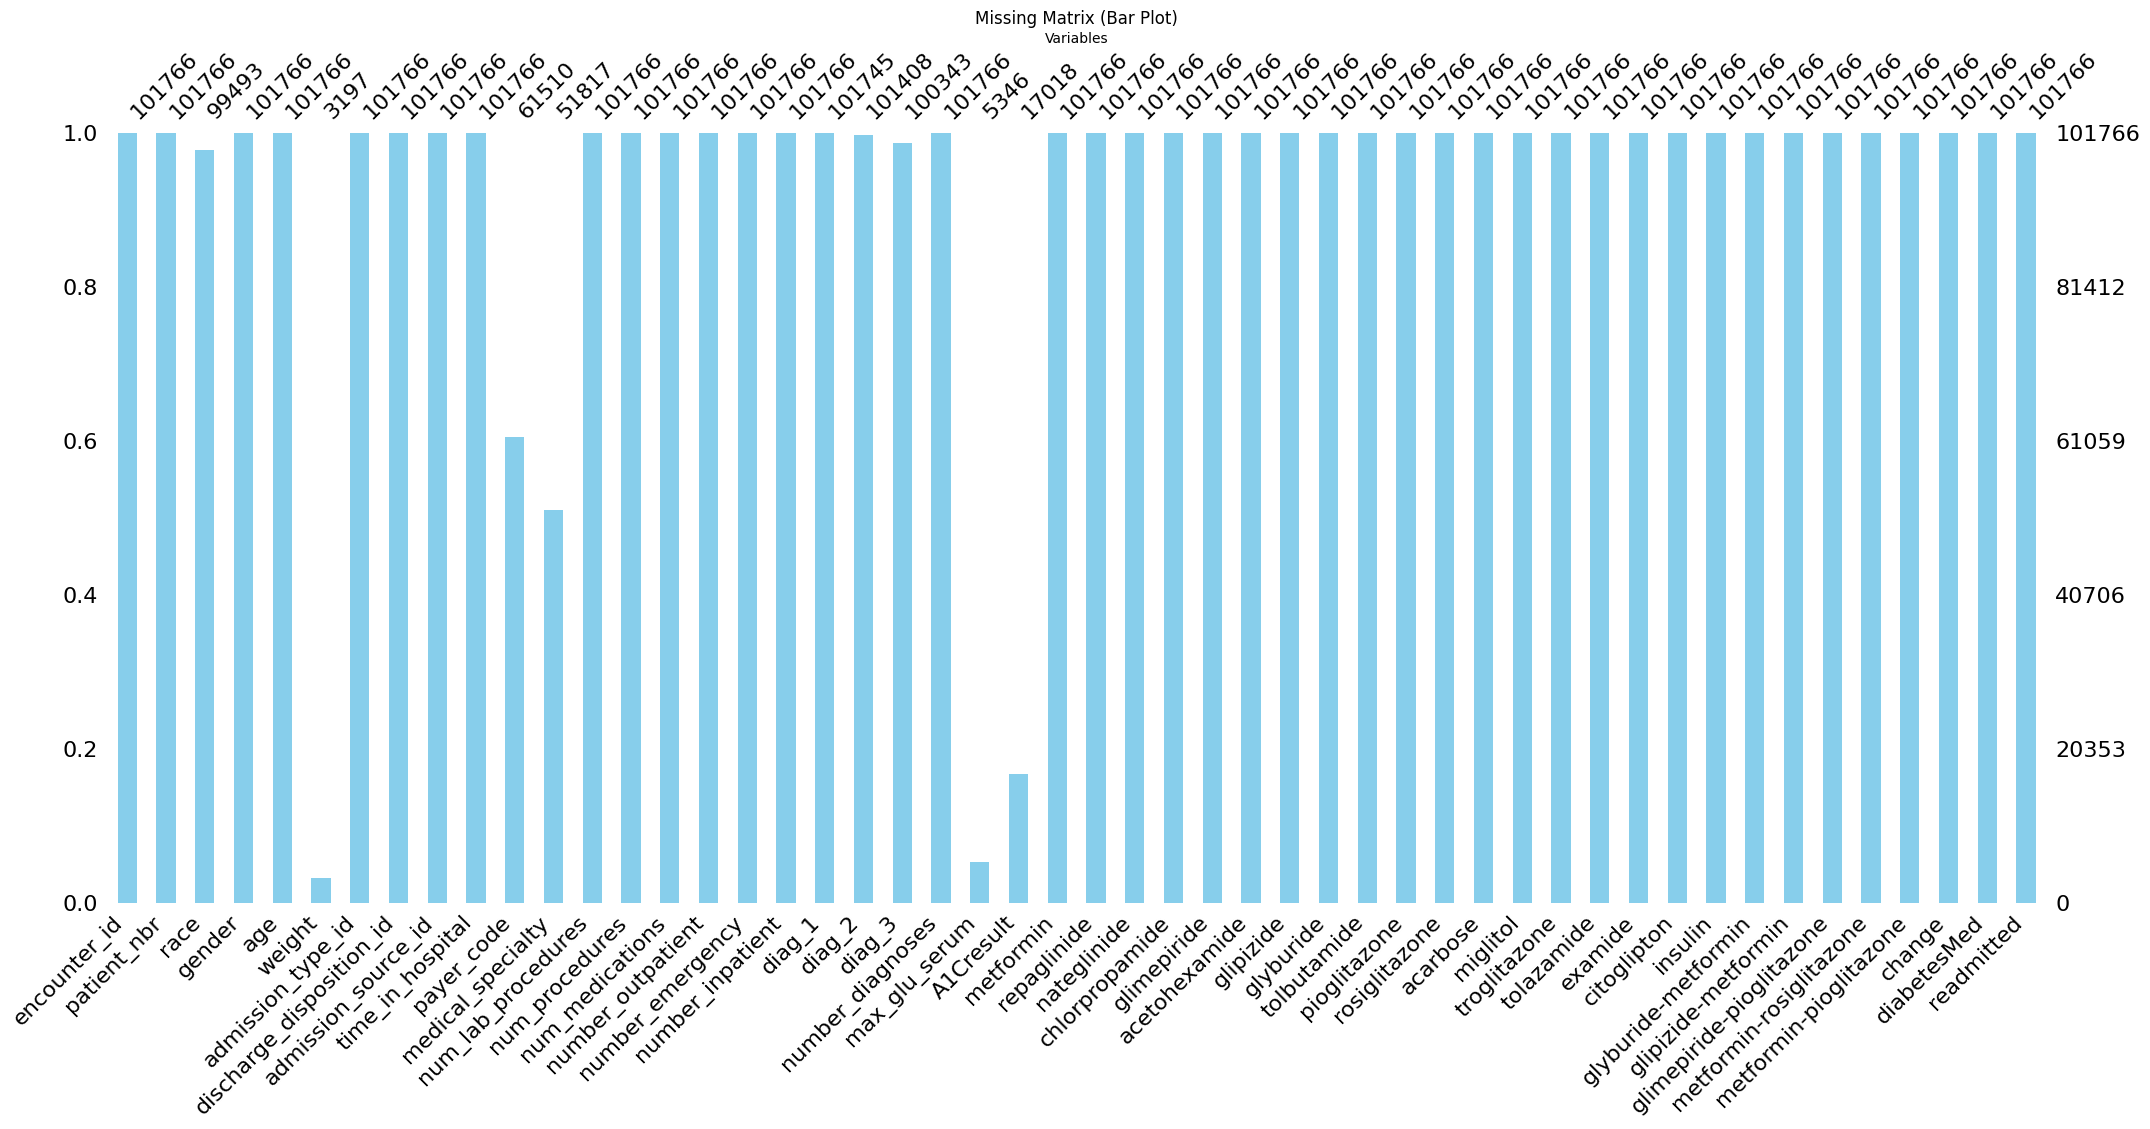

In [51]:
import matplotlib.pyplot as plt
msno.bar(df, color='skyblue')
plt.title('Missing Matrix (Bar Plot)')
plt.xlabel('Variables')
plt.ylabel('Availability of Data (Ratio)')
plt.show()



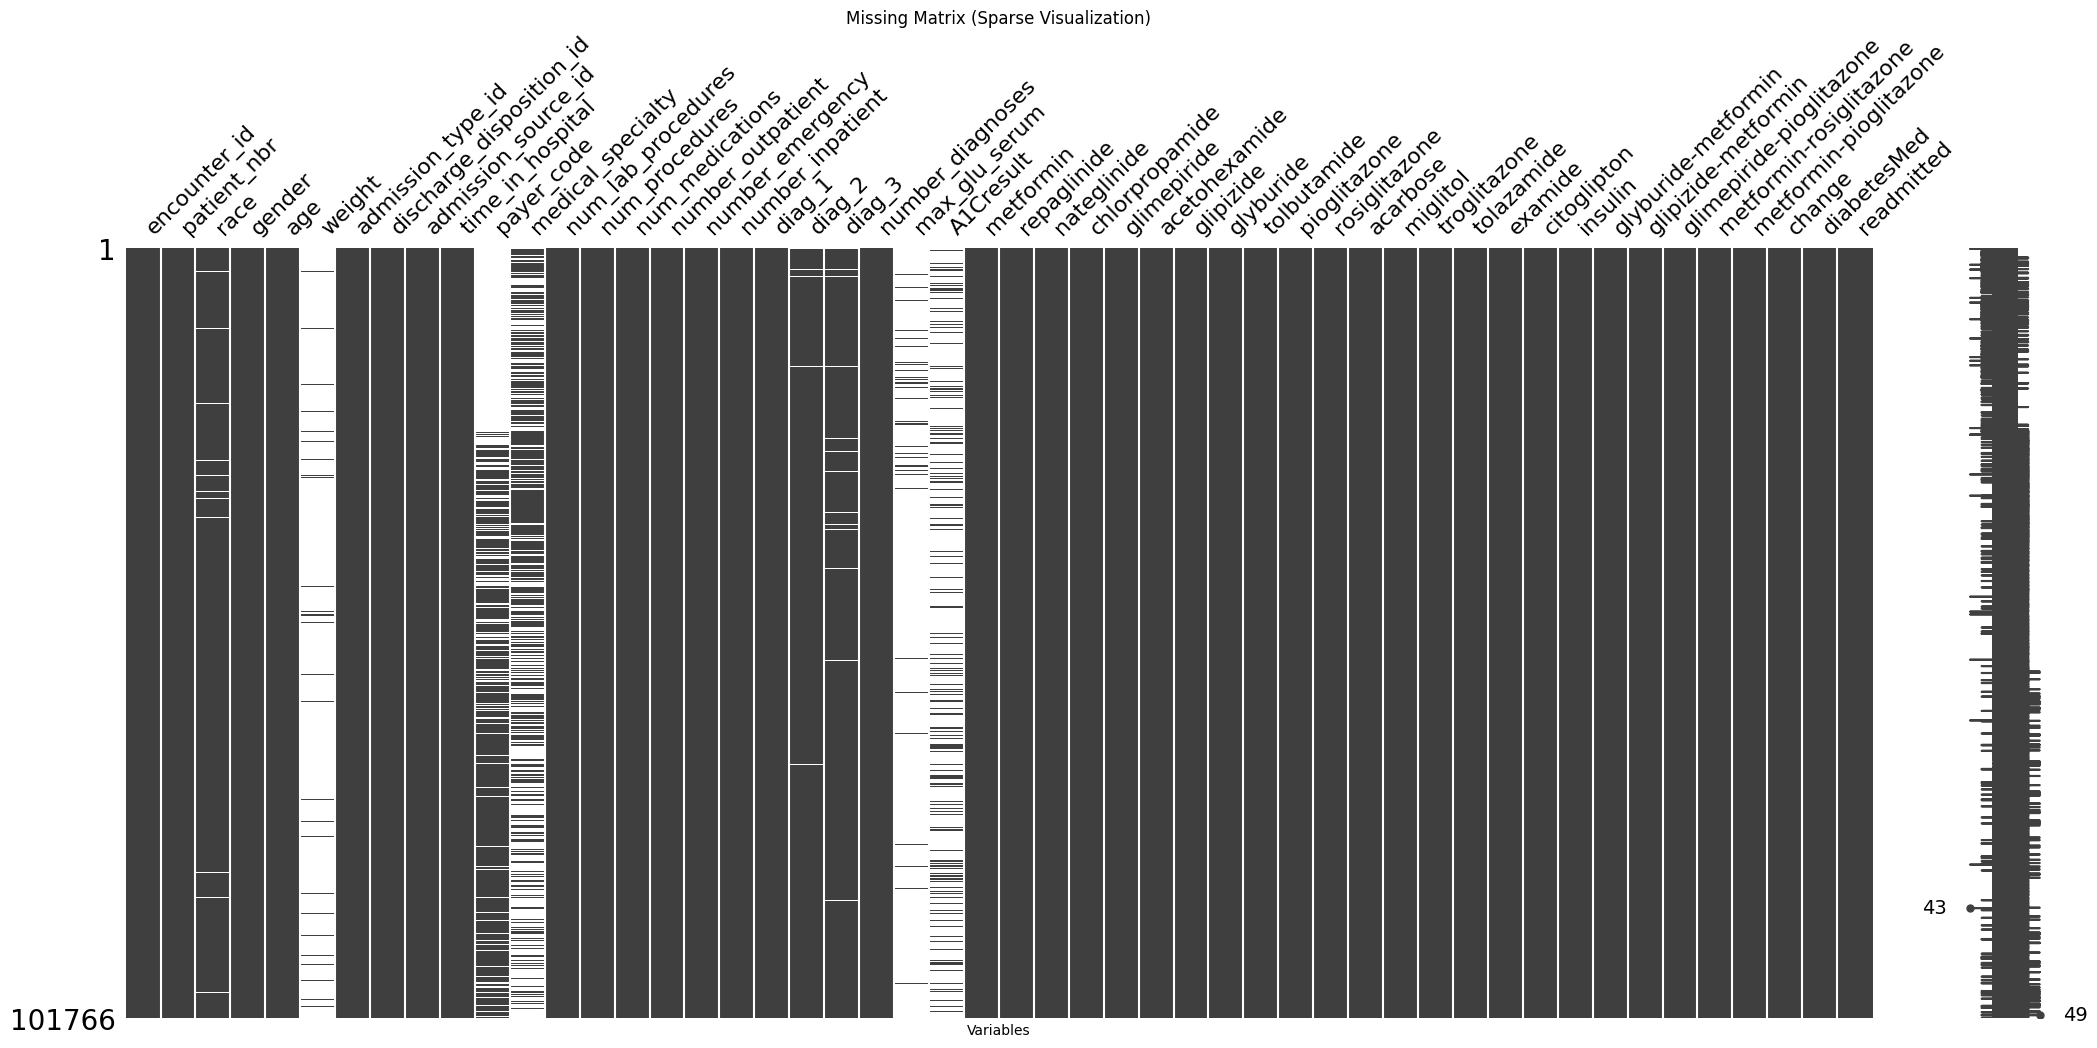

In [53]:
msno.matrix(df)
plt.title('Missing Matrix (Sparse Visualization)')
plt.xlabel('Variables')
plt.show()

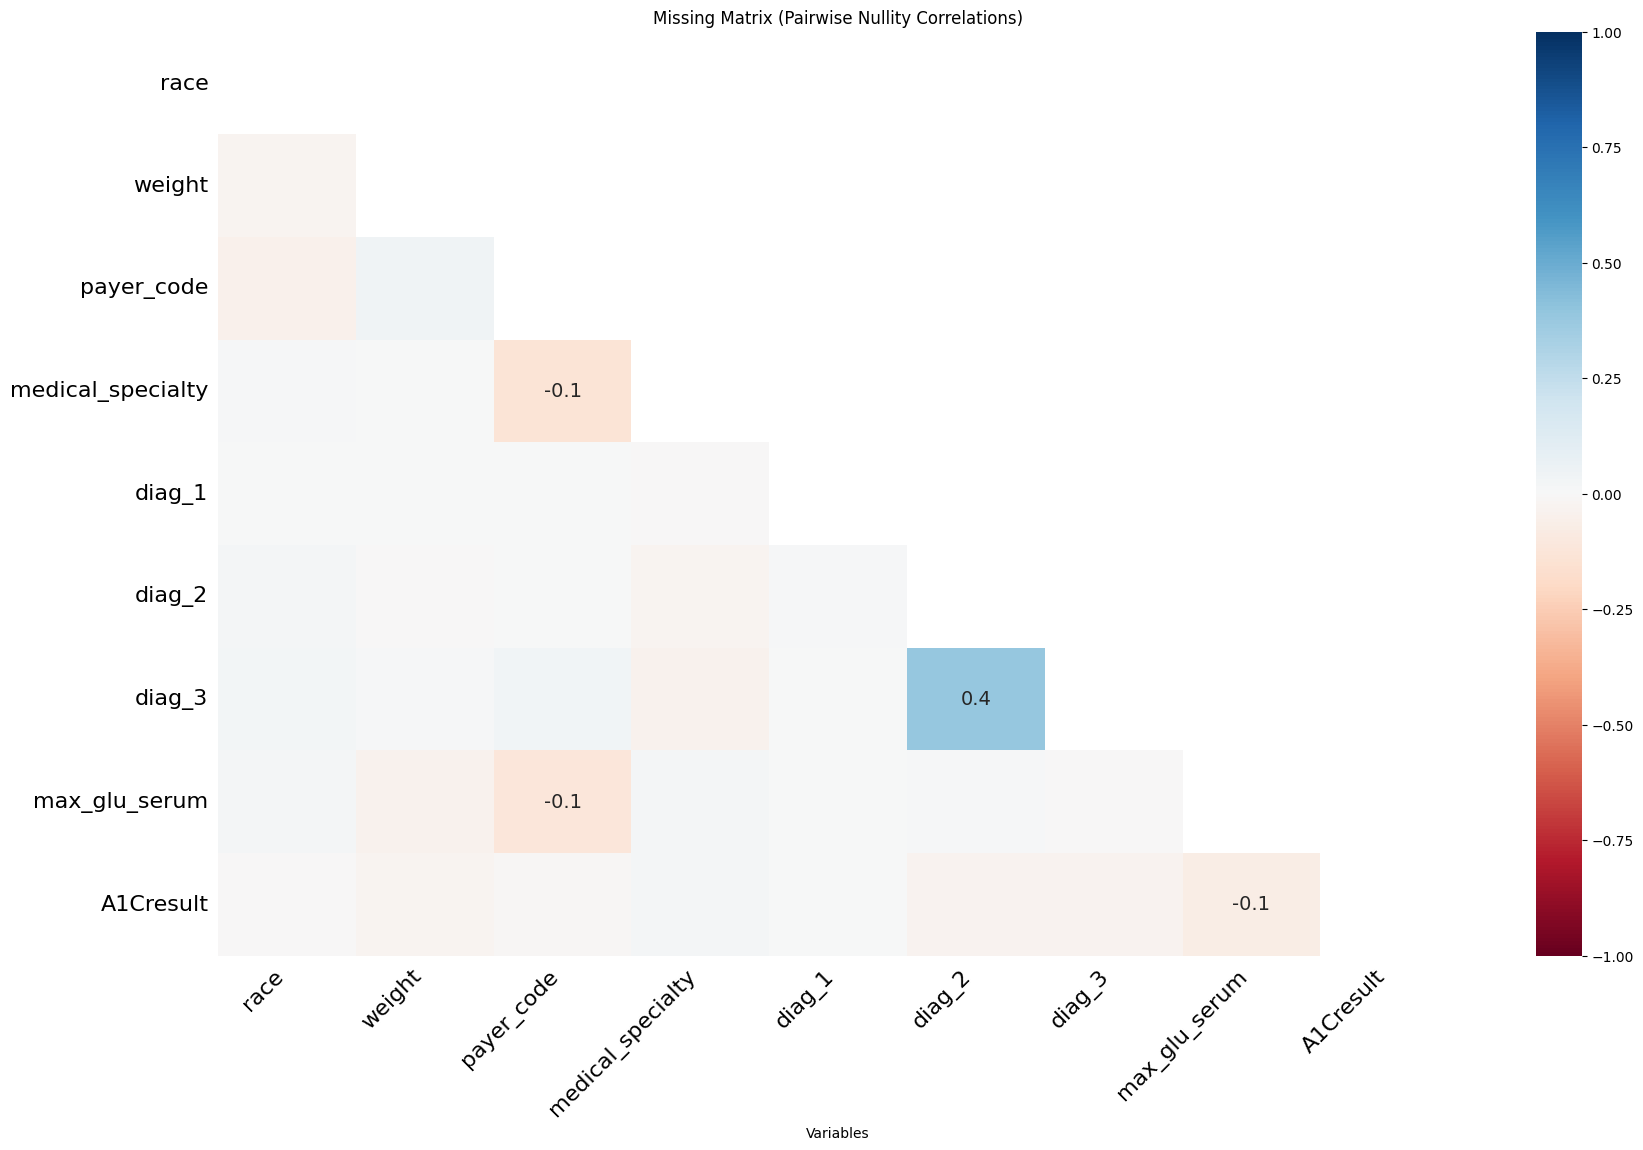

In [54]:
msno.heatmap(df)
plt.title('Missing Matrix (Pairwise Nullity Correlations)')
plt.xlabel('Variables')
plt.show()

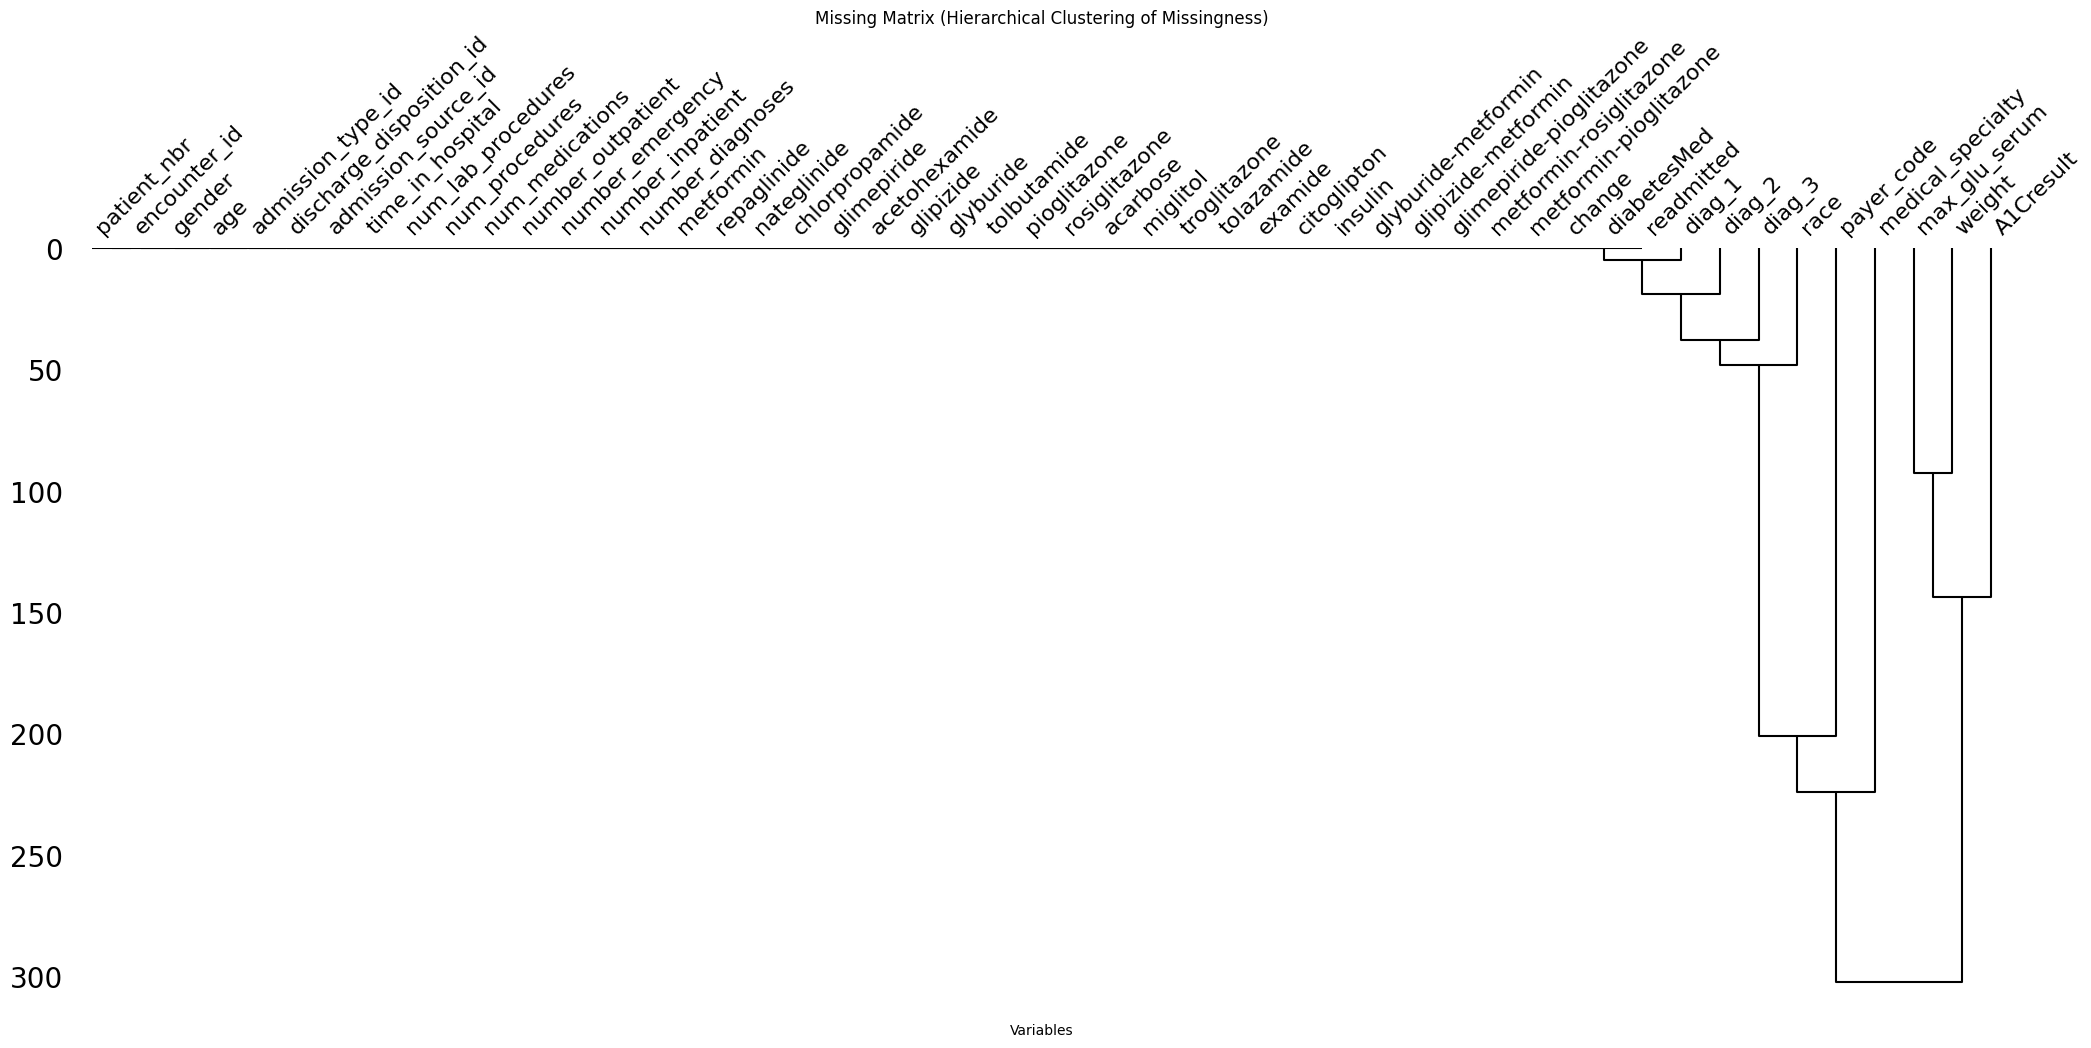

In [55]:
msno.dendrogram(df)
plt.title('Missing Matrix (Hierarchical Clustering of Missingness)')
plt.xlabel('Variables')
plt.show()

1. **weight** stands out being missing for almost all rows (96.85%) with next few paretos being **max_glu_serum** (94.7%), **A1Cresult** (83.3%), **payer_code** (39.6%), **medical_speciality** (49.1%) with race and diag_1-3 variables being largely complete.
2. No siginificant horizontal bands is observed in the matrix plot, suggesting that the missing data is feature-specific (vertical missing bands) and not row-specific
3. The missingness of the **max_glu_serum** and **A1Cresult** variables are not insignificant for interpretation, as it explains that the Glucose Serum test and/or the HbA1C test was not done or documented in patient's profile. Hence, data imputation can still be explored to replace "None" with "Not measured" to maintain the potential feature importance in the dataset where readmission is being studied
4. A moderate (0.4) score of co-missingness is observed between **diag_2** and **diag_3** which would be reasonable if only primary diagnoses (**diag_1**) were made and hence there were no secondary or additional secondary diagnosis.
5. Other variables that have missing data show weak or no correlation -- confirming that occurrence of missingness is likely independent. There is no strong evidence of systematic missingness across multiple features.
6. High missingness in **A1Cresult** and **max_glu_serum** explains being closer connected on the dendrogram. On the heatmap, the variables show a weak negative correlation (-0.1) suggesting only mild substitution - whereas if one is missing, the other is only very slightly more likely to be present. 
7. **weight**, **payer_code** and **medical_specialty** show a close cluster on the dendrogram, but these could just be representative of its shared sparsity (among the top paretos) as weight, payer_code (whether through MedicCare or other means) and medical specialty of the admitting physician are not logically correlated.
8. **weight** should be dropped -- data is too sparse to be meaningful.

**Studying max_glu_serum and A1Cresult variables to confirm if any test substitution was occurring :**

C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\1916164862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['max_glu_serum'] = df1['max_glu_serum'].apply(lambda x: x if x == "Not Measured" else 'Measured')
C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\1916164862.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['A1Cresult'] = df1['A1Cresult'].apply(lambda x: x if x == "Not Measured" else 'Measured')


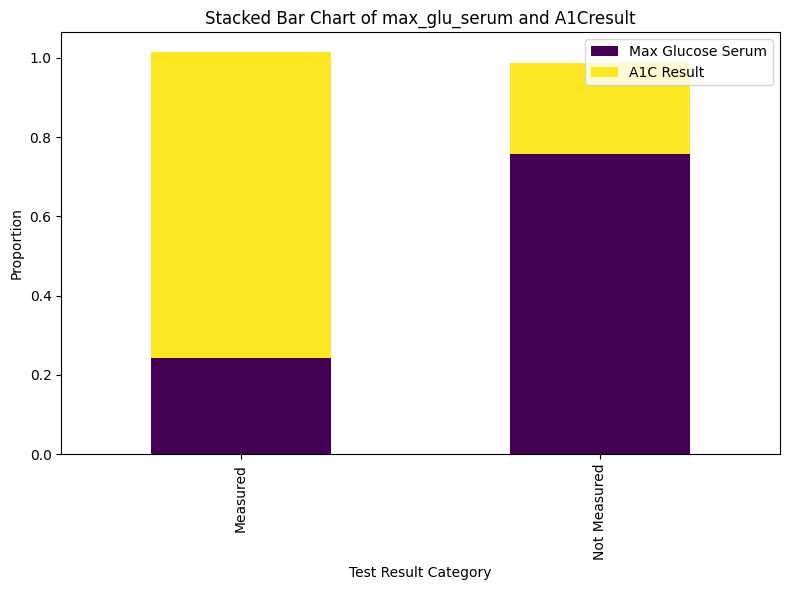

In [74]:
# Replace 'None' with 'Nil' for visibility
df['max_glu_serum'] = df['max_glu_serum'].fillna("Not Measured")
df['A1Cresult'] = df['A1Cresult'].fillna("Not Measured")
#Drop where both columns were not measured (majority of rows)
df1 = df[~((df['max_glu_serum'] == 'Not Measured') & (df['A1Cresult'] == 'Not Measured'))]
#Replace measured results with just "Measured"
df1['max_glu_serum'] = df1['max_glu_serum'].apply(lambda x: x if x == "Not Measured" else 'Measured')
df1['A1Cresult'] = df1['A1Cresult'].apply(lambda x: x if x == "Not Measured" else 'Measured')
# Normalize value counts
glu_counts = df1['max_glu_serum'].value_counts(normalize=True)
a1c_counts = df1['A1Cresult'].value_counts(normalize=True)

# Combine into a single DataFrame
stacked_df = pd.DataFrame({
    'Max Glucose Serum': glu_counts,
    'A1C Result': a1c_counts
}).fillna(0)

# Plot stacked bar
stacked_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='viridis')
plt.title('Stacked Bar Chart of max_glu_serum and A1Cresult')
plt.ylabel('Proportion')
plt.xlabel('Test Result Category')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [73]:
pd.crosstab(df1["max_glu_serum"], df1["A1Cresult"])

A1Cresult      Measured  Not Measured
max_glu_serum                        
Measured            298          5048
Not Measured      16720             0

A1Cresult was measured far more often than max_glu_serum in the retained dataset.The fact that only 298 out of 22,066 of at least 1 test measured occurrences had both tests measured (~1.35%) suggests low co-occurrence.The weak negative correlation (–0.1) in missingness supports this: when one test is missing, the other is slightly more likely to be present.Clinicians may have opted for A1C over glucose serum for chronic monitoring. Or vice versa in acute settings although max_glu_serum has a larger share in the non-measured category, reinforcing its lower usage. We could combine these into a single binary feature: “Any glucose test done” as indicator of test presence. Or use them as mutually exclusive indicators with test results granularity to capture clinical decision pathways and patient outcomes. The latter option will be retained until it is explored later during feature engineering on whether the test results themselves have significance on readmission.

**Drop Weight** 

With nearly 97% missing, any imputation would be speculative and likely introduce noise.It fails the threshold for meaningful statistical inference or predictive modeling. It clusters with payer_code and medical_specialty in the dendrogram, but this is driven by shared sparsity—not semantic or clinical relevance

In [77]:
df.drop(columns='weight', inplace=True)

**Feature Data Uniqueness Checks**

In [79]:
distinct_counts = pd.DataFrame({
    'Feature': df.columns,
    'Distinct Count': df.nunique().values
}).sort_values(by='Distinct Count', ascending=False)

print(distinct_counts)

                     Feature  Distinct Count
0               encounter_id          101766
1                patient_nbr           71518
19                    diag_3             789
18                    diag_2             748
17                    diag_1             716
11        num_lab_procedures             118
13           num_medications              75
10         medical_specialty              72
14         number_outpatient              39
15          number_emergency              33
6   discharge_disposition_id              26
16          number_inpatient              21
9                 payer_code              17
7        admission_source_id              17
20          number_diagnoses              16
8           time_in_hospital              14
4                        age              10
5          admission_type_id               8
12            num_procedures               7
2                       race               5
29                 glipizide               4
41       g

1. *Variable **examide** and **citoglipton** are constants in the dataset. They can be dropped as they do not explain variance and have no predictive power*
2. Variables should also be studied for having near zero variance in their distribution.
3. **Patient_nbr count** (71518) is less than **encounter_id** (101766) -- suggesting there are repeated encounters and thus encounter based patient profile available for certain patients. Data analysis will thus need to be framed based on the analytical goal or problem statement on whether encounter-level prediction granularity is needed for readmission risk based on different feature profiles or a patient-level trajectory is of concern OR just the first readmission instance of <30 days which has past precedence (Strack et al., 2014). #citation: Clore, J., Cios, K., DeShazo, J., & Strack, B. (2014). Diabetes 130-US Hospitals for Years 1999-2008 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5230J
4. **diag_1-3** categorical variables are significantly variant -- further analysis is needed on whether any clustering can be done based on domain knowledge of the ICD9 codes.
5. Overall, feature predictor as well as target variable distributions should also be explored for all.

In [80]:
df.drop(columns=['examide', 'citoglipton'], inplace=True)

Low Variance Features:
                      Feature                              Type
0                nateglinide  Near-Zero Variance - >99% Unique
1             chlorpropamide  Near-Zero Variance - >99% Unique
2              acetohexamide  Near-Zero Variance - >99% Unique
3                tolbutamide  Near-Zero Variance - >99% Unique
4                   acarbose  Near-Zero Variance - >99% Unique
5                   miglitol  Near-Zero Variance - >99% Unique
6               troglitazone  Near-Zero Variance - >99% Unique
7                 tolazamide  Near-Zero Variance - >99% Unique
8        glyburide-metformin  Near-Zero Variance - >99% Unique
9        glipizide-metformin  Near-Zero Variance - >99% Unique
10  glimepiride-pioglitazone  Near-Zero Variance - >99% Unique
11   metformin-rosiglitazone  Near-Zero Variance - >99% Unique
12    metformin-pioglitazone  Near-Zero Variance - >99% Unique


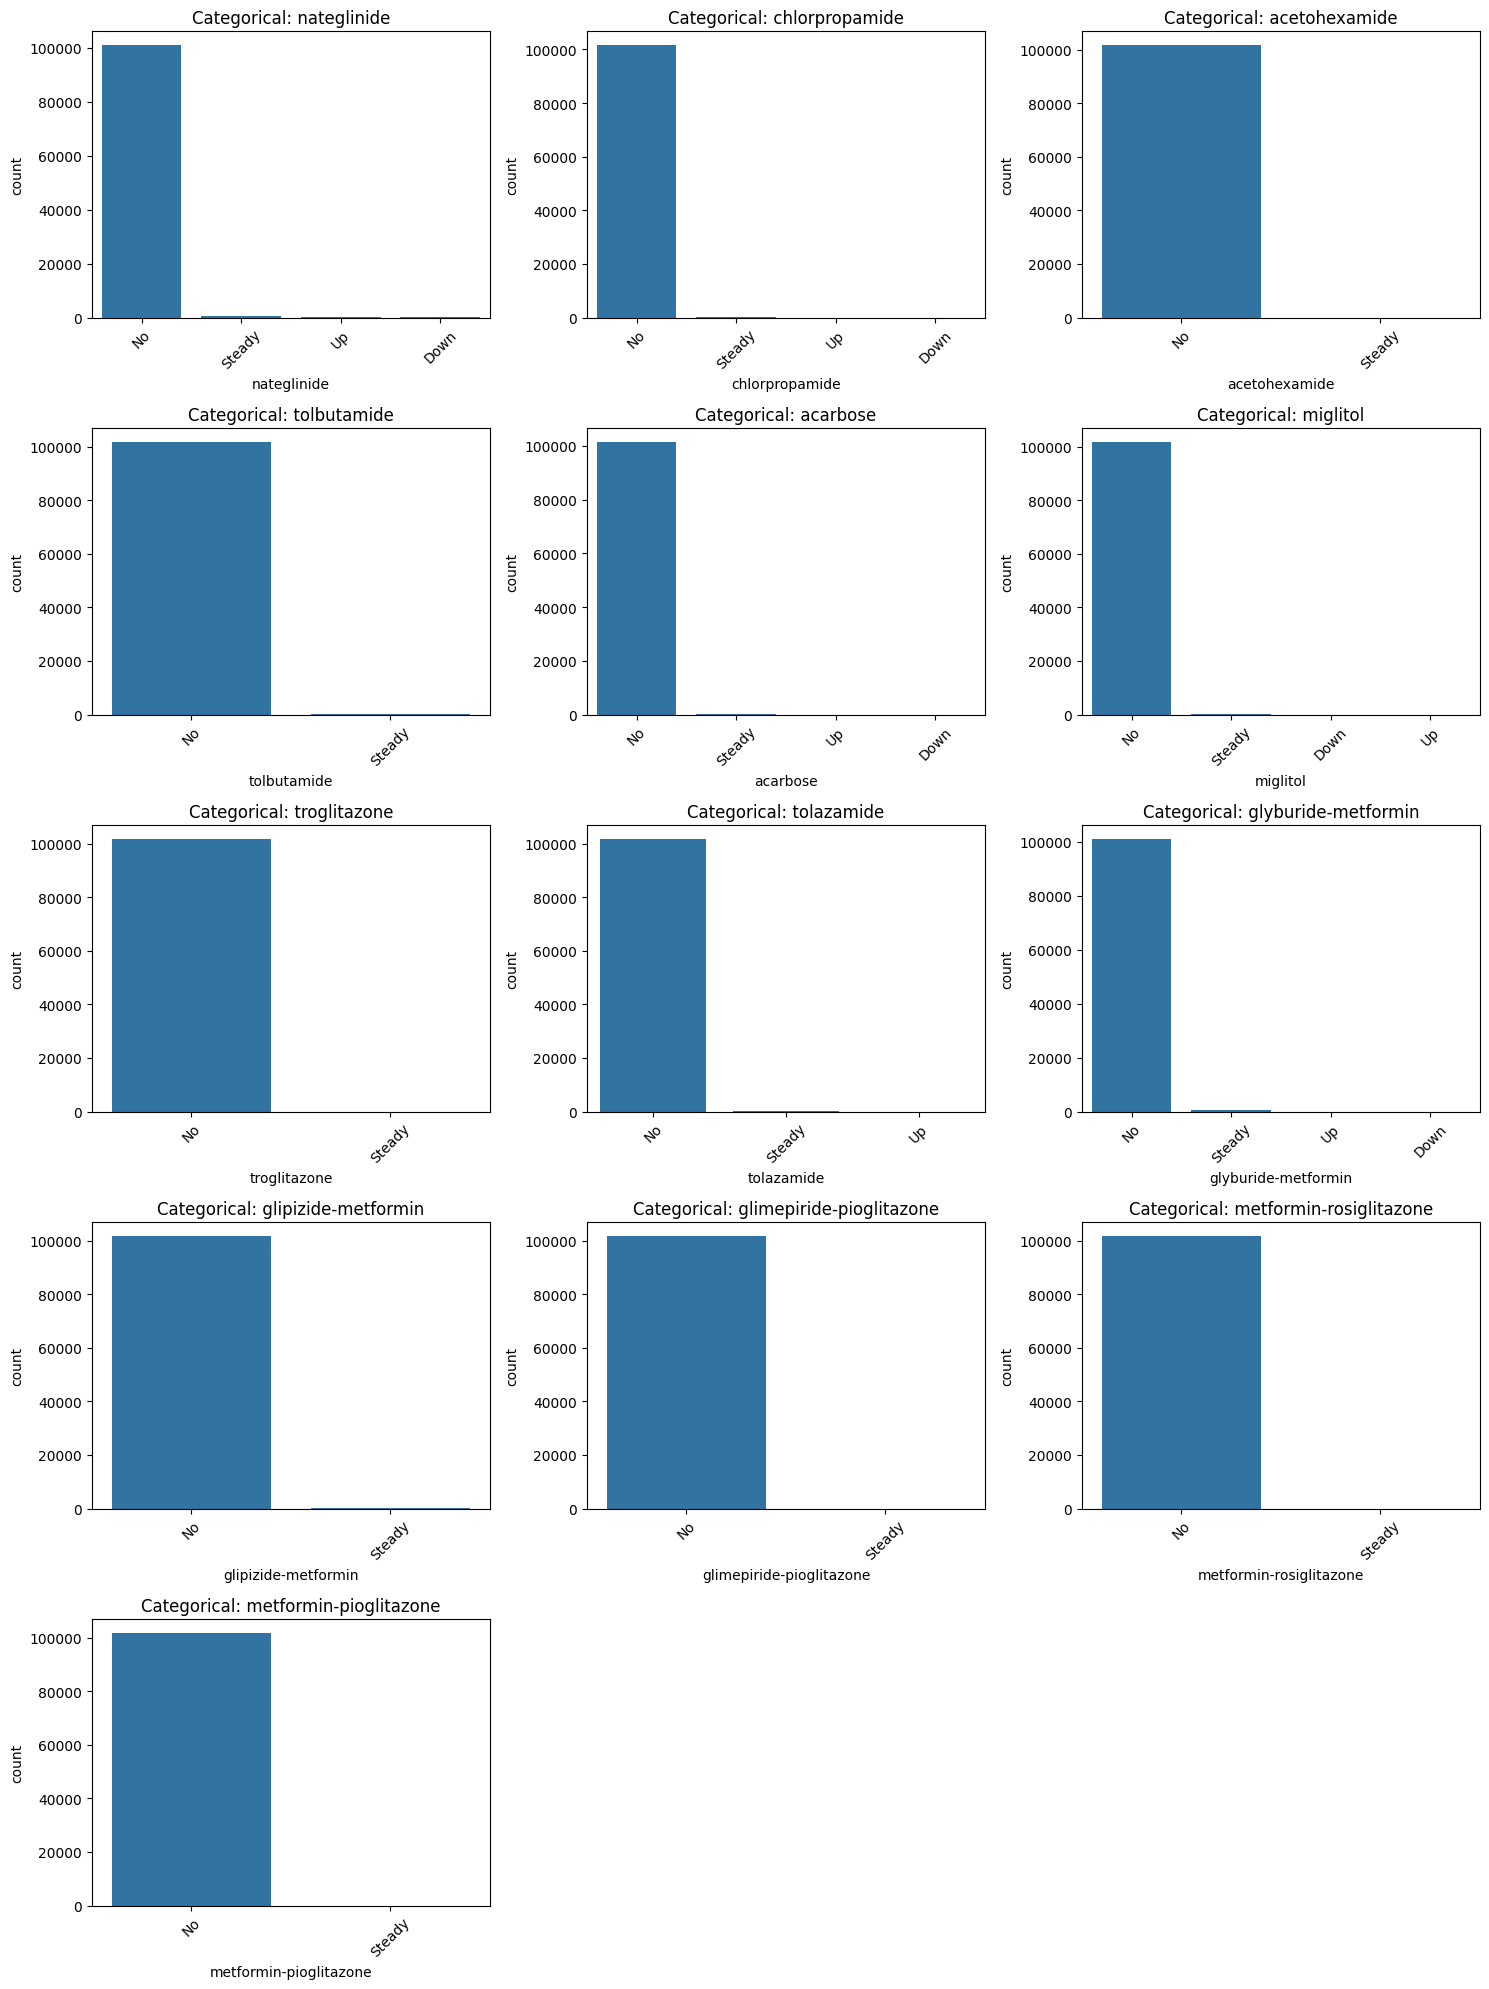

In [91]:
import seaborn as sns
import math
# Threshold for near-zero variance
NZV_THRESHOLD = 0.01  # Adjust as needed

# Identify zero and near-zero variance features
def detect_low_variance_features(df, threshold=NZV_THRESHOLD):
    low_var_features = []
    for col in df.columns:
        freq = df[col].value_counts(normalize=True, dropna=False)
        if len(freq) == 1:
            low_var_features.append((col, 'Zero Variance'))
        elif freq.iloc[0] > (1 - threshold):
            low_var_features.append((col, 'Near-Zero Variance - >99% Unique'))
    return pd.DataFrame(low_var_features, columns=['Feature', 'Type'])

# Plot distributions
def plot_feature_distributions(df, features_df, max_cols=3):
    features = features_df['Feature'].tolist()
    n = len(features)
    ncols = min(n, max_cols)
    nrows = math.ceil(n / ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5 * ncols, 4 * nrows))
    axes = axes.flatten()
    for i, feature in enumerate(features):
        ax= axes[i]
        if pd.api.types.is_numeric_dtype(df[feature]):
            sns.histplot(df[feature], bins=10, kde=False, ax=ax)
            ax.set_title(f'Numeric: {feature}')
        else:
            sns.countplot(x=df[feature], order=df[feature].value_counts().index, ax=ax)
            ax.set_title(f'Categorical: {feature}')
            ax.tick_params(axis='x', rotation=45)
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

# Run the analysis
low_var_df = detect_low_variance_features(df)
print("Low Variance Features:\n", low_var_df)

# Plot distributions of near-zero variance features
plot_feature_distributions(df, low_var_df[low_var_df['Type'] == 'Near-Zero Variance - >99% Unique'])

The bar charts confirm that almost all patients have "No" for these medications.
This suggests these drugs were either:
1. Not prescribed during the study period
2. Clinically irrelevant for the majority of diabetic cases

From data science perspective, given the near-zero variance of these features, they will not be able to explain the variance and be meaningful predictors for readmission risk.

**Drop Low Variance Features**

In [94]:
df.drop(columns=low_var_df.Feature.to_list(), inplace=True)

**Domain Knowledge Application on ID Parameters (Discharge Disposition, Admission Source, Admission Type, Diag_1-3 Codes, Payer_Code)**

In [152]:
df_ids_mapping = pd.read_csv("IDS_mapping.csv")
df_ids_mapping

ID                                        description                 Type
0    1                                          Emergency    admission_type_id
1    2                                             Urgent    admission_type_id
2    3                                           Elective    admission_type_id
3    4  Still patient or expected to return for outpat...    admission_type_id
4    5                                      Not Available    admission_type_id
..  ..                                                ...                  ...
58  22   Transfer from hospital inpt/same fac reslt in...  admission_source_id
59  23                          Born inside this hospital  admission_source_id
60  24                         Born outside this hospital  admission_source_id
61  25            Transfer from Ambulatory Surgery Center  admission_source_id
62  26                              Transfer from Hospice  admission_source_id

[63 rows x 3 columns]

Citation: Clore, J., Cios, K., DeShazo, J., & Strack, B. (2014). Diabetes 130-US Hospitals for Years 1999-2008 [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5230J for IDSMapping file

In [154]:
df["discharge_disposition_name"] = df["discharge_disposition_id"].apply(lambda x:df_ids_mapping[(df_ids_mapping["Type"]=="discharge_disposition_id") & (df_ids_mapping["ID"] == x)].description.values[0])

In [156]:
df["admission_type_name"] = df["admission_type_id"].apply(lambda x:df_ids_mapping[(df_ids_mapping["Type"]=="admission_type_id") & (df_ids_mapping["ID"] == x)].description.values[0])

In [157]:
df["admission_source_name"] = df["admission_source_id"].apply(lambda x:df_ids_mapping[(df_ids_mapping["Type"]=="admission_source_id") & (df_ids_mapping["ID"] == x)].description.values[0])

Diagnoses mapping citation: https://www.icd9data.com/2015/Volume1/default.htm

In [161]:
# Define ICD-9 chapter ranges
icd9_chapters = {
    'Infectious and Parasitic Diseases': (1, 139),
    'Neoplasms': (140, 239),
    'Endocrine, Nutritional, Metabolic': (240, 279),
    'Blood and Blood-Forming Organs': (280, 289),
    'Mental Disorders': (290, 319),
    'Nervous System and Sense Organs': (320, 389),
    'Circulatory System': (390, 459),
    'Respiratory System': (460, 519),
    'Digestive System': (520, 579),
    'Genitourinary System': (580, 629),
    'Pregnancy and Childbirth': (630, 679),
    'Skin and Subcutaneous Tissue': (680, 709),
    'Musculoskeletal System': (710, 739),
    'Congenital Anomalies': (740, 759),
    'Perinatal Conditions': (760, 779),
    'Symptoms and Ill-Defined Conditions': (780, 799),
    'Injury and Poisoning': (800, 999),
    'Supplementary Factors (V codes)': ('V01', 'V91'),
    'External Causes (E codes)': ('E000', 'E999')
}

In [162]:
def map_icd9(code):
    try:
        if code.startswith('V'):
            return 'Supplementary Factors (V codes)'
        elif code.startswith('E'):
            return 'External Causes (E codes)'
        else:
            num = float(code)
            for chapter, (low, high) in icd9_chapters.items():
                if isinstance(low, (int, float)) and low <= num <= high:
                    return chapter
    except:
        return 'Unknown'
    return 'Unknown'

In [164]:
# Apply mapping to each diagnosis column
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[f'{col}_category'] = df[col].apply(map_icd9)

df.head()

encounter_id  patient_nbr             race  gender      age  \
0       2278392      8222157        Caucasian  Female   [0-10)   
1        149190     55629189        Caucasian  Female  [10-20)   
2         64410     86047875  AfricanAmerican  Female  [20-30)   
3        500364     82442376        Caucasian    Male  [30-40)   
4         16680     42519267        Caucasian    Male  [40-50)   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital payer_code  ... insulin  change  diabetesMed  readmitted  \
0                 1        NaN  ...      No      No           No          NO   
1                 3        NaN  ...      Up      Ch          Yes         >30   
2                 2        NaN  ...      No      No          Yes          NO   
3                 2        NaN  ...      Up      Ch          Yes          NO   
4                 1        NaN  ...  Steady      Ch          Yes          NO   

   discharge_disposition_name  admission_type_name  admission_source_name  \
0                  Not Mapped                  NaN     Physician Referral   
1          Discharged to home            Emergency         Emergency Room   
2          Discharged to home            Emergency         Emergency Room   
3          Discharged to home            Emergency         Emergency Room   
4          Discharged to home            Emergency         Emergency Room   

                     diag_1_category                    diag_2_category  \
0  Endocrine, Nutritional, Metabolic                            Unknown   
1  Endocrine, Nutritional, Metabolic  Endocrine, Nutritional, Metabolic   
2           Pregnancy and Childbirth  Endocrine, Nutritional, Metabolic   
3  Infectious and Parasitic Diseases  Endocrine, Nutritional, Metabolic   
4                          Neoplasms                          Neoplasms   

                     diag_3_category  
0                            Unknown  
1  Endocrine, Nutritional, Metabolic  
2    Supplementary Factors (V codes)  
3                 Circulatory System  
4  Endocrine, Nutritional, Metabolic  

[5 rows x 40 columns]

In [165]:
df.tail()

encounter_id  patient_nbr             race  gender      age  \
101761     443847548    100162476  AfricanAmerican    Male  [70-80)   
101762     443847782     74694222  AfricanAmerican  Female  [80-90)   
101763     443854148     41088789        Caucasian    Male  [70-80)   
101764     443857166     31693671        Caucasian  Female  [80-90)   
101765     443867222    175429310        Caucasian    Male  [70-80)   

        admission_type_id  discharge_disposition_id  admission_source_id  \
101761                  1                         3                    7   
101762                  1                         4                    5   
101763                  1                         1                    7   
101764                  2                         3                    7   
101765                  1                         1                    7   

        time_in_hospital payer_code  ... insulin  change  diabetesMed  \
101761                 3         MC  ...    Down      Ch          Yes   
101762                 5         MC  ...  Steady      No          Yes   
101763                 1         MC  ...    Down      Ch          Yes   
101764                10         MC  ...      Up      Ch          Yes   
101765                 6        NaN  ...      No      No           No   

        readmitted     discharge_disposition_name  admission_type_name  \
101761         >30  Discharged/transferred to SNF            Emergency   
101762          NO  Discharged/transferred to ICF            Emergency   
101763          NO             Discharged to home            Emergency   
101764          NO  Discharged/transferred to SNF               Urgent   
101765          NO             Discharged to home            Emergency   

                                  admission_source_name  \
101761                                   Emergency Room   
101762   Transfer from a Skilled Nursing Facility (SNF)   
101763                                   Emergency Room   
101764                                   Emergency Room   
101765                                   Emergency Room   

                          diag_1_category                    diag_2_category  \
101761  Endocrine, Nutritional, Metabolic                   Mental Disorders   
101762                   Digestive System  Endocrine, Nutritional, Metabolic   
101763  Infectious and Parasitic Diseases               Genitourinary System   
101764               Injury and Poisoning     Blood and Blood-Forming Organs   
101765                   Digestive System                   Digestive System   

                            diag_3_category  
101761                   Circulatory System  
101762  Symptoms and Ill-Defined Conditions  
101763                     Mental Disorders  
101764                 Injury and Poisoning  
101765  Symptoms and Ill-Defined Conditions  

[5 rows x 40 columns]

**Studying Repeated Patient Profiles in Dataset**

In [105]:
top_patients = (
    df['patient_nbr']
    .value_counts()
    .head(50)
    .index.tolist()
)

df_top = df[df['patient_nbr'].isin(top_patients)].copy()

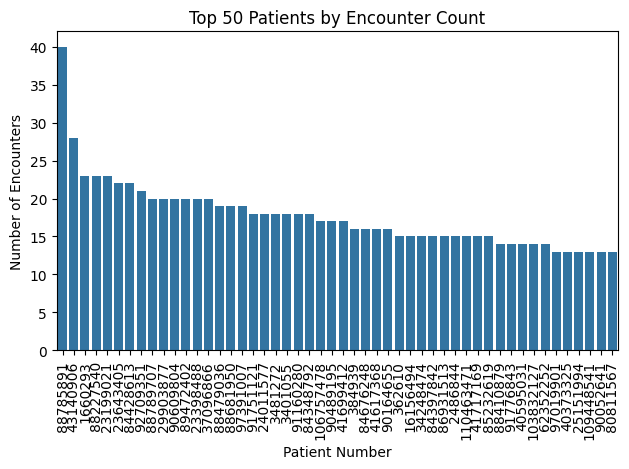

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_top, x='patient_nbr', order=top_patients)
plt.title('Top 50 Patients by Encounter Count')
plt.ylabel('Number of Encounters')
plt.xlabel('Patient Number')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [176]:
from scipy.stats import skew
import numpy as np

def choose_plot_type(df, feature, target='readmitted', skew_threshold=1.0, min_samples=100):
    data = df[[feature, target]].dropna()
    n = data.shape[0]
    feature_skew = skew(data[feature])

    if n < min_samples:
        return 'boxplot'
    elif abs(feature_skew) > skew_threshold:
        return 'distribution'
    else:
        counts, bins = np.histogram(data[feature], bins=20)
        peaks = sum((counts[i] > counts[i-1]) and (counts[i] > counts[i+1]) for i in range(1, len(counts)-1))
        return 'distribution' if peaks > 1 else 'boxplot'


C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\713399027.py:38: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.5)


⚠️ age: Low-support categories (<50 samples): ['[0-10)']
⚠️ payer_code: Low-support categories (<50 samples): ['OT', 'WC', 'SI']


C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\713399027.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='readmitted', y=feature, ax=ax, palette=palette)


⚠️ repaglinide: Low-support categories (<50 samples): ['Down']
⚠️ rosiglitazone: Low-support categories (<50 samples): ['Down']
⚠️ admission_type_name: Low-support categories (<50 samples): ['Not Mapped', 'Still patient or expected to return for outpatient services', 'Trauma Center']
⚠️ admission_source_name: Low-support categories (<50 samples): [' Not Available', ' Not Mapped', ' Transfer from hospital inpt/same fac reslt in a sep claim', ' Court/Law Enforcement', ' Transfer from critial access hospital', 'Normal Delivery']
⚠️ diag_1_category: Low-support categories (<50 samples): ['Congenital Anomalies', 'Unknown']
⚠️ diag_2_category: Low-support categories (<50 samples): ['Congenital Anomalies']
⚠️ diag_3_category: Low-support categories (<50 samples): ['Congenital Anomalies']


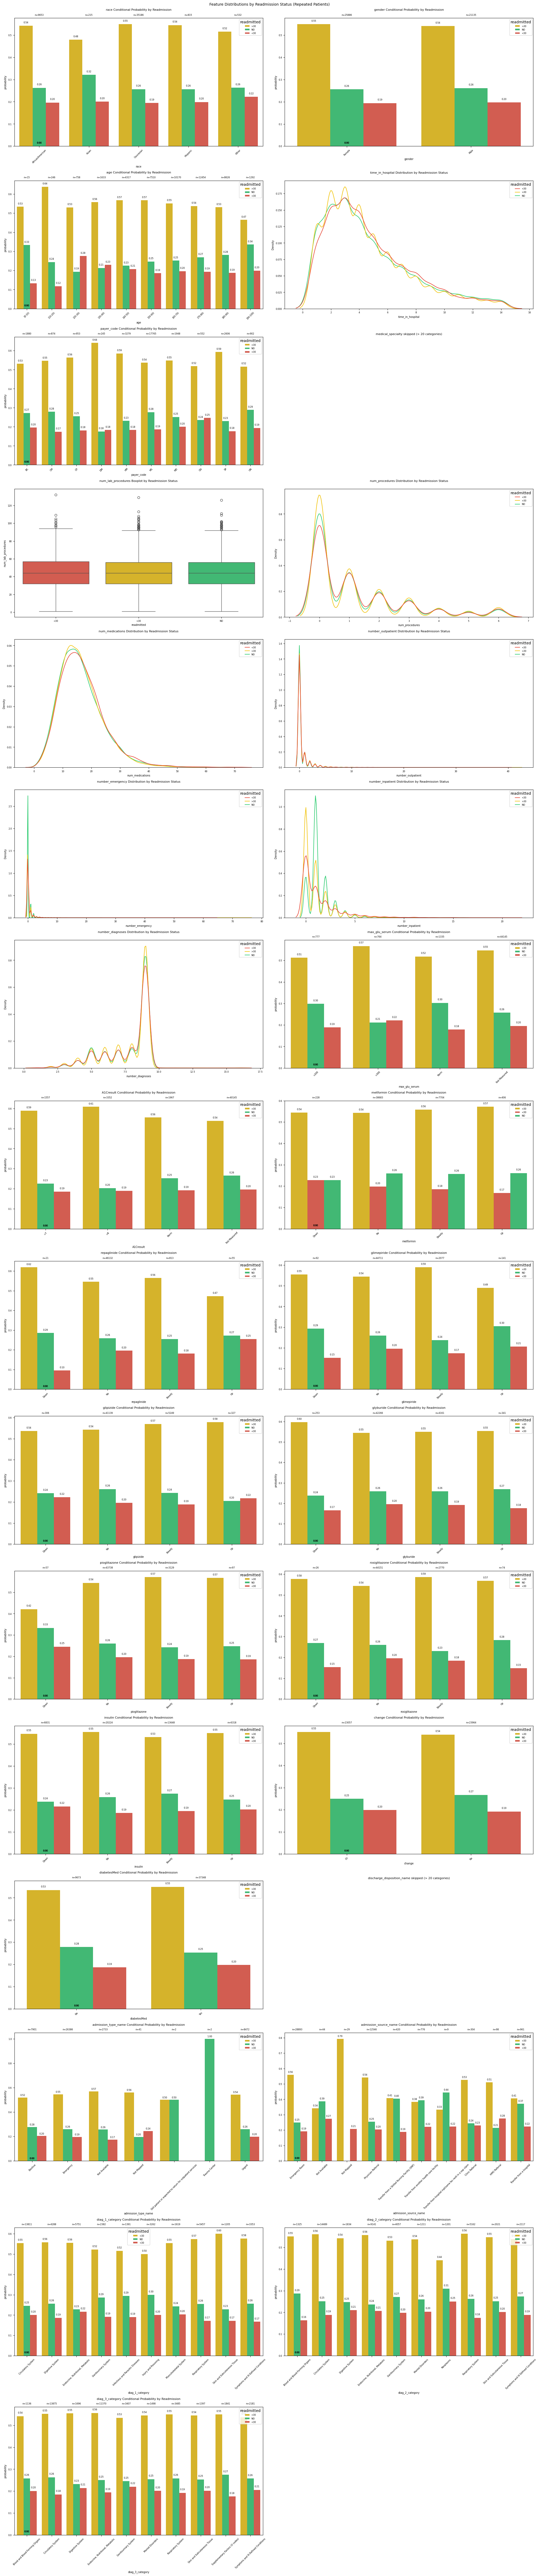

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter repeated patients
repeated_patients = df['patient_nbr'].value_counts()
repeated_ids = repeated_patients[repeated_patients > 1].index.tolist()
df_repeated = df[df['patient_nbr'].isin(repeated_ids)].copy()

# Step 2: Define features & drop unmapped ID or ICD9 numerical features and retain its valuable name based counterparts
features_df = df_repeated.drop(columns=["readmitted","encounter_id","patient_nbr","diag_1","diag_2","diag_3","discharge_disposition_id","admission_type_id","admission_source_id"])
#print(features_df.head())

# Step 3: Plot numerical distributions
# Plot distributions
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

def plot_feature_distributions(df, features_df, title_set, max_cols=2, cardinality_threshold=20, min_support=50, top_n=10):
    features = features_df.columns.tolist()
    n = len(features)
    ncols = min(n, max_cols)
    nrows = math.ceil(n / ncols)

    # Dynamic font scaling
    base_font = max(8, int(14 - 0.5 * nrows))
    plt.rcParams.update({
        'axes.titlesize': base_font,
        'axes.labelsize': base_font - 1,
        'xtick.labelsize': base_font - 2,
        'ytick.labelsize': base_font - 2,
        'legend.fontsize': base_font - 2
    })

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10 * ncols, 6 * nrows), constrained_layout=True)
    plt.subplots_adjust(hspace=0.5)
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]

        if pd.api.types.is_numeric_dtype(df[feature]):
            plot_type = choose_plot_type(df, feature, target='readmitted')
            if plot_type == 'boxplot':
                palette = {'<30': '#e74c3c', '>30': '#f1c40f', 'NO': '#2ecc71'}  # 🔴 <30: Red for urgency 🟡 >30: Yellow for delayed readmission 🟢 NO: Green for no readmission
                sns.boxplot(data=df, x='readmitted', y=feature, ax=ax, palette=palette)
                ax.set_title(f'{feature} Boxplot by Readmission Status', pad=20)
            else:
                palette = {'<30': '#e74c3c', '>30': '#f1c40f', 'NO': '#2ecc71'}  # 🔴 <30: Red for urgency 🟡 >30: Yellow for delayed readmission 🟢 NO: Green for no readmission
                sns.kdeplot(data=df, x=feature, hue='readmitted', common_norm=False, ax=ax,palette=palette) #remove distortion from group_size
                ax.set_title(f'{feature} Distribution by Readmission Status', pad=20)
            #sns.boxplot(data=df, x='readmitted', y=feature, ax=ax)
            #ax.set_title(f'{feature} Distribution by Readmission Status', pad=20)
        else:
            # Skip high-cardinality categorical features
            if df[feature].nunique() > cardinality_threshold:
                ax.axis('off')
                ax.set_title(f'{feature} skipped (> {cardinality_threshold} categories)')
                continue

            # Flag low-support categories
            freq = df[feature].value_counts()
            flagged = freq[freq < min_support].index.tolist()
            if flagged:
                print(f"⚠️ {feature}: Low-support categories (<{min_support} samples): {flagged}")

            # Filter top N categories
            top_categories = freq.head(top_n).index
            df_plot = df[df[feature].isin(top_categories)]

            # Conditional probabilities
            prob_df = (
                df_plot.groupby(feature)['readmitted']
                .value_counts(normalize=True)
                .rename('probability')
                .reset_index()
            )
            palette = {'<30': '#e74c3c', '>30': '#f1c40f', 'NO': '#2ecc71'}  # 🔴 <30: Red for urgency 🟡 >30: Yellow for delayed readmission 🟢 NO: Green for no readmission
            sns.barplot(data=prob_df, x=feature, y='probability', hue='readmitted', ax=ax, palette=palette)

            # Annotate sample sizes
            for k, cat in enumerate(prob_df[feature].unique()):
                total = df_plot[df_plot[feature] == cat].shape[0]
                ax.annotate(f"n={total}", xy=(k, 1.02), xycoords=('data', 'axes fraction'),
            ha='center', fontsize=base_font - 2, color='black')

            # Annotate probability values on bars
            for p in ax.patches:
                height = p.get_height()
                if not np.isnan(height):
                    ax.text(
                        p.get_x() + p.get_width() / 2,
                        height + 0.01,
                        f"{height:.2f}",
                        ha='center',
                        va='bottom',
                        fontsize=base_font - 2,
                        color='black'
                    )

            ax.set_title(f'{feature} Conditional Probability by Readmission', pad=20)
            ax.tick_params(axis='x', labelrotation=45)

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title_set, fontsize=base_font + 2)
    plt.show()

# Plot distributions for repeated patients
plot_feature_distributions(df_repeated, features_df, "Feature Distributions by Readmission Status (Repeated Patients)", max_cols=2)

C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\713399027.py:38: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.5)


⚠️ gender: Low-support categories (<50 samples): ['Unknown/Invalid']
⚠️ payer_code: Low-support categories (<50 samples): ['FR']


C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\713399027.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='readmitted', y=feature, ax=ax, palette=palette)


⚠️ repaglinide: Low-support categories (<50 samples): ['Down']
⚠️ admission_type_name: Low-support categories (<50 samples): ['Trauma Center', 'Still patient or expected to return for outpatient services']
⚠️ admission_source_name: Low-support categories (<50 samples): [' Court/Law Enforcement', ' Transfer from hospital inpt/same fac reslt in a sep claim', ' Transfer from critial access hospital', ' Extramural Birth', 'Normal Delivery', ' Transfer from Ambulatory Surgery Center', ' Sick Baby']
⚠️ diag_1_category: Low-support categories (<50 samples): ['Unknown', 'External Causes (E codes)']


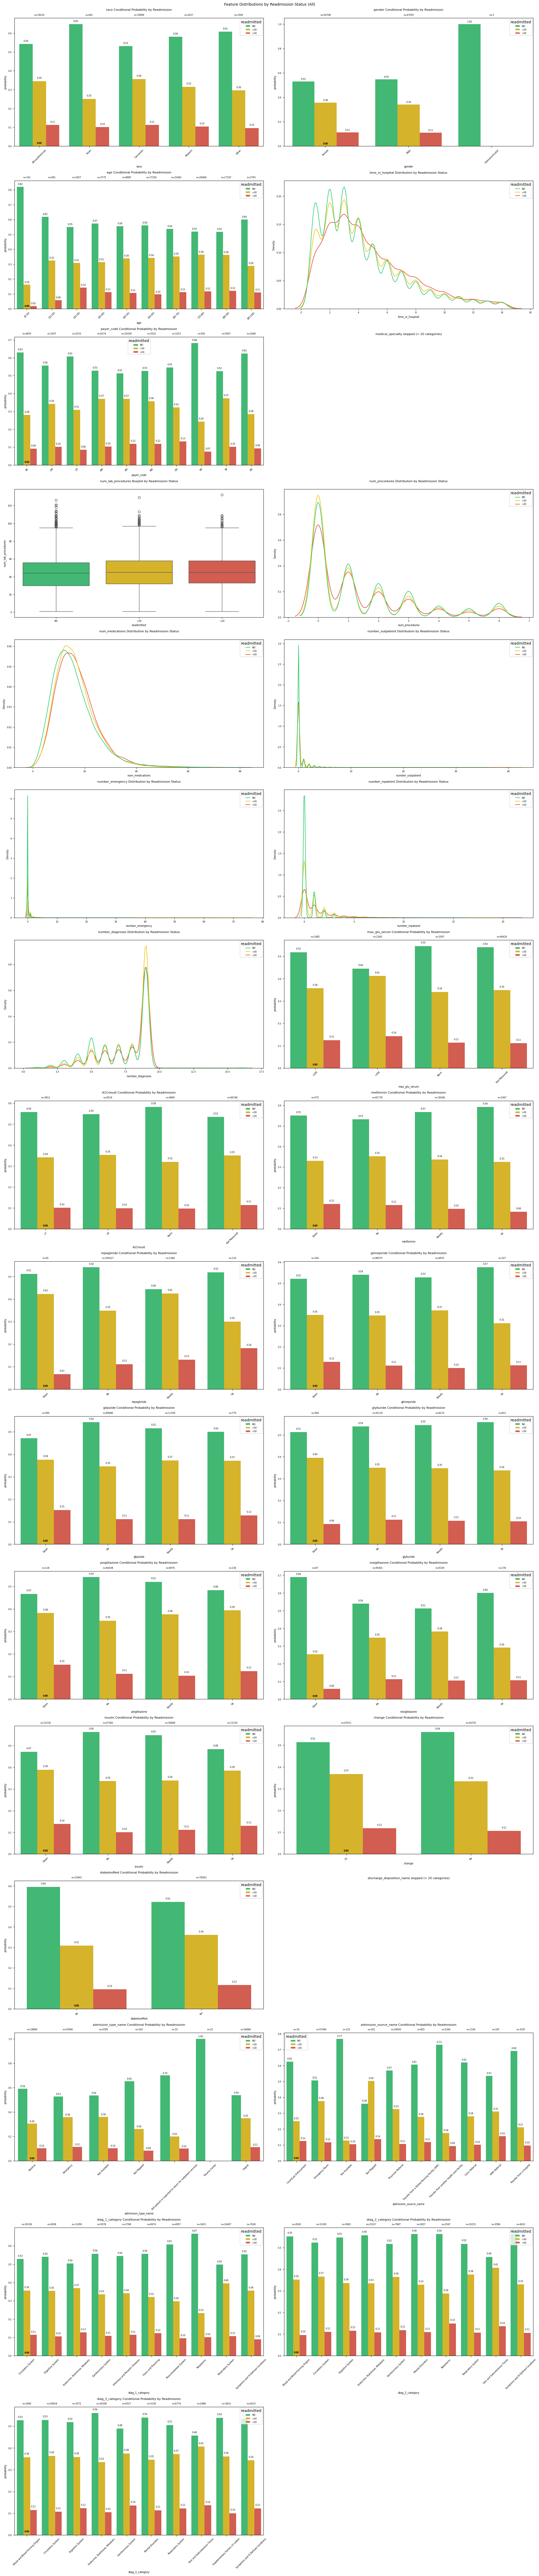

In [182]:

# Step 2: Define features
features_df = df.drop(columns=["readmitted","encounter_id","patient_nbr","diag_1","diag_2","diag_3","discharge_disposition_id","admission_type_id","admission_source_id"])
#print(features_df.head())
plot_feature_distributions(df, features_df,"Feature Distributions by Readmission Status (All)", max_cols=2)

**Studying First-Encounter Only for Readmission Risk**

In [174]:
# Step 1: Sort by encounter_id (ascending)
df_sorted = df.sort_values(by='encounter_id')

# Step 2: Keep only the first encounter per patient
df_first_encounter = df_sorted.drop_duplicates(subset='patient_nbr', keep='first')

C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\713399027.py:38: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.5)


⚠️ gender: Low-support categories (<50 samples): ['Unknown/Invalid']
⚠️ payer_code: Low-support categories (<50 samples): ['SI', 'MP', 'FR']


C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\713399027.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='readmitted', y=feature, ax=ax, palette=palette)


⚠️ repaglinide: Low-support categories (<50 samples): ['Down']
⚠️ admission_type_name: Low-support categories (<50 samples): ['Trauma Center', 'Still patient or expected to return for outpatient services']
⚠️ admission_source_name: Low-support categories (<50 samples): [' Court/Law Enforcement', ' Transfer from critial access hospital', ' Transfer from hospital inpt/same fac reslt in a sep claim', ' Extramural Birth', ' Transfer from Ambulatory Surgery Center', 'Normal Delivery', ' Sick Baby']
⚠️ diag_1_category: Low-support categories (<50 samples): ['Congenital Anomalies', 'Unknown', 'External Causes (E codes)']


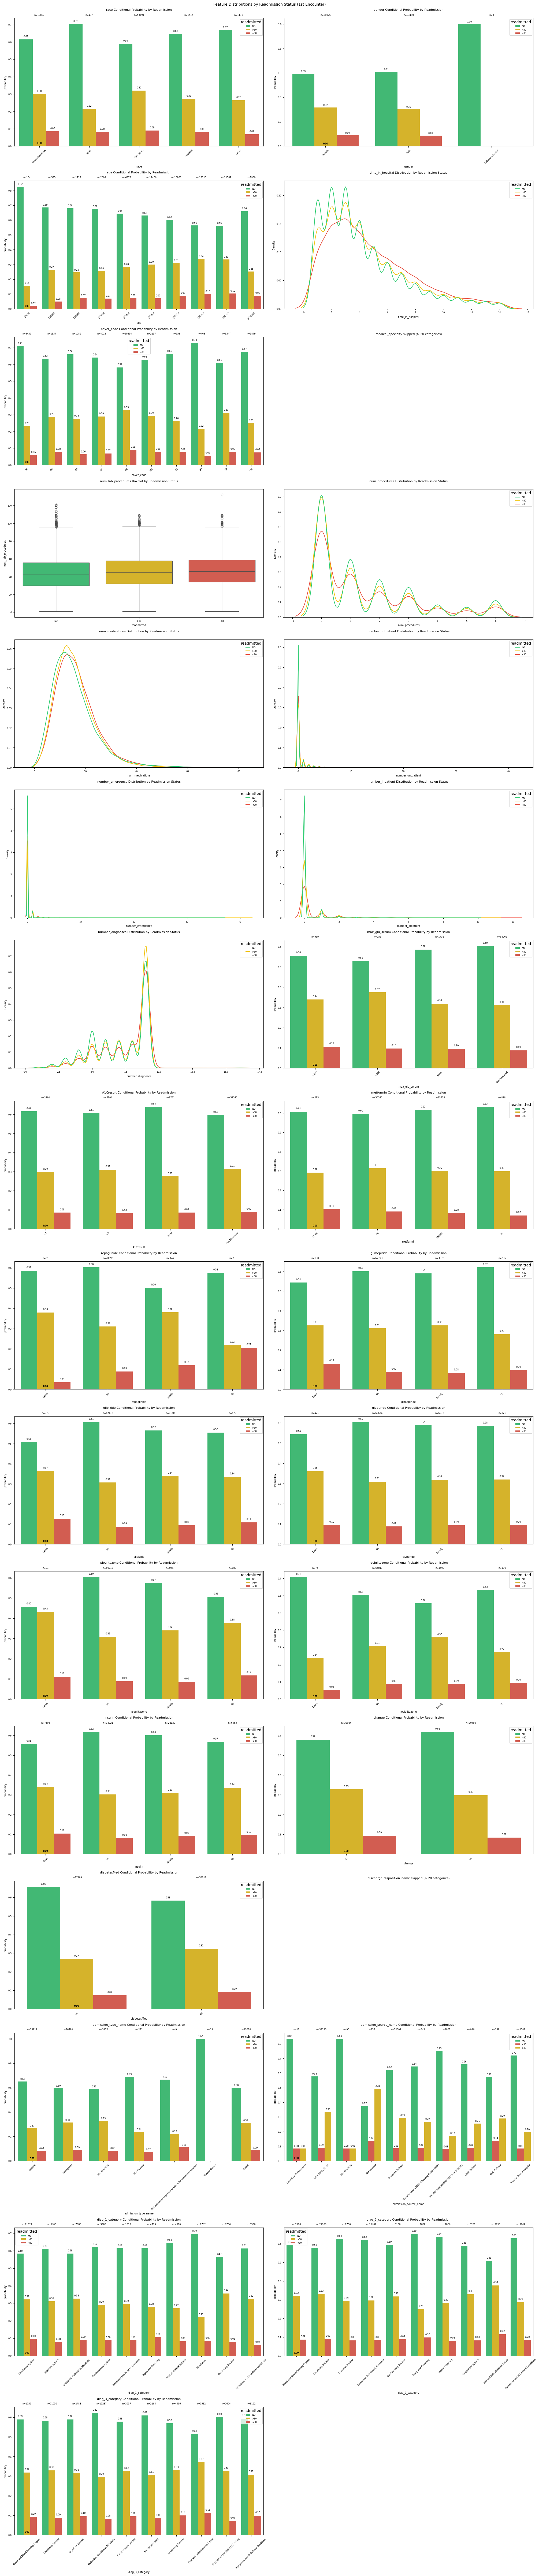

In [183]:
features_df = df_first_encounter.drop(columns=["readmitted","encounter_id","patient_nbr","diag_1","diag_2","diag_3","discharge_disposition_id","admission_type_id","admission_source_id"])
plot_feature_distributions(df_first_encounter, features_df, "Feature Distributions by Readmission Status (1st Encounter)", max_cols=2)

##### **Overall Feature Distribution Analysis**

In [184]:
def plot_feature_distributions_flexible(
    df, features_df, title_set, hue=None,
    max_cols=2, cardinality_threshold=20, min_support=50, top_n=10
):
    import matplotlib.pyplot as plt
    import seaborn as sns
    import math
    import numpy as np
    import pandas as pd

    features = features_df.columns.tolist()
    n = len(features)
    ncols = min(n, max_cols)
    nrows = math.ceil(n / ncols)

    base_font = max(8, int(14 - 0.5 * nrows))
    plt.rcParams.update({
        'axes.titlesize': base_font,
        'axes.labelsize': base_font - 1,
        'xtick.labelsize': base_font - 2,
        'ytick.labelsize': base_font - 2,
        'legend.fontsize': base_font - 2
    })

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10 * ncols, 6 * nrows), constrained_layout=True)
    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]

        if pd.api.types.is_numeric_dtype(df[feature]):
            plot_type = choose_plot_type(df, feature, target=hue) if hue else 'distribution'

            if plot_type == 'boxplot' and hue:
                sns.boxplot(data=df, x=hue, y=feature, ax=ax)
                ax.set_title(f'{feature} Boxplot by {hue}', pad=20)
            else:
                if hue:
                    sns.kdeplot(data=df, x=feature, hue=hue, common_norm=False, ax=ax)
                    ax.set_title(f'{feature} Distribution by {hue}', pad=20)
                else:
                    sns.histplot(data=df, x=feature, kde=True, ax=ax)
                    ax.set_title(f'{feature} Distribution', pad=20)

        else:
            if df[feature].nunique() > cardinality_threshold:
                ax.axis('off')
                ax.set_title(f'{feature} skipped (> {cardinality_threshold} categories)')
                continue

            freq = df[feature].value_counts()
            flagged = freq[freq < min_support].index.tolist()
            if flagged:
                print(f"⚠️ {feature}: Low-support categories (<{min_support} samples): {flagged}")

            top_categories = freq.head(top_n).index
            df_plot = df[df[feature].isin(top_categories)]

            if hue:
                prob_df = (
                    df_plot.groupby(feature)[hue]
                    .value_counts(normalize=True)
                    .rename('probability')
                    .reset_index()
                )
                sns.barplot(data=prob_df, x=feature, y='probability', hue=hue, ax=ax)

                for k, cat in enumerate(prob_df[feature].unique()):
                    total = df_plot[df_plot[feature] == cat].shape[0]
                    ax.annotate(f"n={total}", xy=(k, 1.02), xycoords=('data', 'axes fraction'),
                                ha='center', fontsize=base_font - 2, color='black')

                for p in ax.patches:
                    height = p.get_height()
                    if not np.isnan(height):
                        ax.text(p.get_x() + p.get_width() / 2, height + 0.01,
                                f"{height:.2f}", ha='center', va='bottom',
                                fontsize=base_font - 2, color='black')

                ax.set_title(f'{feature} Conditional Probability by {hue}', pad=20)
            else:
                sns.countplot(data=df_plot, x=feature, ax=ax)
                ax.set_title(f'{feature} Frequency', pad=20)

            ax.tick_params(axis='x', labelrotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(title_set, fontsize=base_font + 2)
    plt.show()


⚠️ gender: Low-support categories (<50 samples): ['Unknown/Invalid']
⚠️ payer_code: Low-support categories (<50 samples): ['SI', 'MP', 'FR']
⚠️ repaglinide: Low-support categories (<50 samples): ['Down']
⚠️ admission_type_name: Low-support categories (<50 samples): ['Trauma Center', 'Still patient or expected to return for outpatient services']
⚠️ admission_source_name: Low-support categories (<50 samples): [' Court/Law Enforcement', ' Transfer from critial access hospital', ' Transfer from hospital inpt/same fac reslt in a sep claim', ' Extramural Birth', ' Transfer from Ambulatory Surgery Center', 'Normal Delivery', ' Sick Baby']
⚠️ diag_1_category: Low-support categories (<50 samples): ['Congenital Anomalies', 'Unknown', 'External Causes (E codes)']


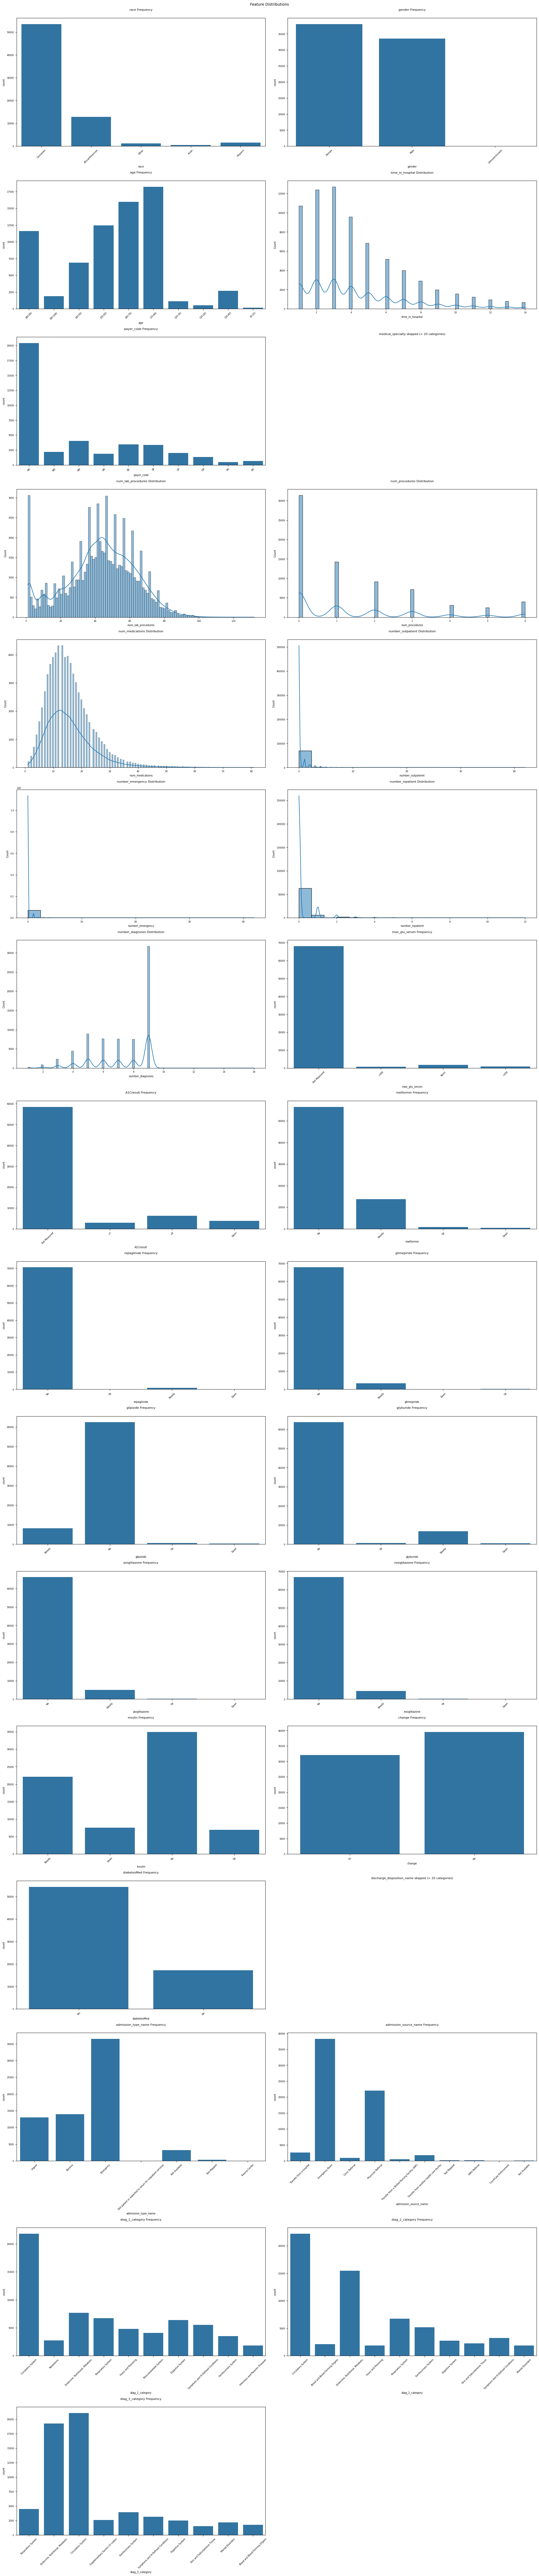

In [185]:
features_df = df.drop(columns=["readmitted","encounter_id","patient_nbr","diag_1","diag_2","diag_3","discharge_disposition_id","admission_type_id","admission_source_id"])
plot_feature_distributions_flexible(df_first_encounter, features_df, "Feature Distributions", max_cols=2)

**Correlation Heatmap**

In [198]:
def plot_feature_heatmap_with_summary(
    df, features_df, method='pearson', figsize=(14, 10),
    cmap='coolwarm', annot=False, threshold=0.3
):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np

    # Step 1: Select and encode features
    selected_df = df[features_df.columns].copy()
    medication_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin'
]

    ordinal_map = {'Down': 0, 'Steady': 1, 'Up': 2, 'No': -1}
    glu_map = {'None': -1, 'Norm': 0, '>200': 1, '>300': 2}
    a1c_map = {'None': -1, 'Norm': 0, '>7': 1, '>8': 2}
    readmit_map = {'NO' : -1, '<30': 0, '>30' : 2}
    age_map = {
    '[0-10)': 0,
    '[10-20)': 1,
    '[20-30)': 2,
    '[30-40)': 3,
    '[40-50)': 4,
    '[50-60)': 5,
    '[60-70)': 6,
    '[70-80)': 7,
    '[80-90)': 8,
    '[90-100)': 9
}

    for col in selected_df.columns:
        if col in medication_cols:
            selected_df[col] = selected_df[col].map(ordinal_map)
        elif col == "max_glu_serum":
            selected_df[col] = selected_df[col].map(glu_map)
        elif col == "A1Cresult":
            selected_df[col] = selected_df[col].map(a1c_map)
        elif col == "readmitted":
            selected_df[col] = selected_df[col].map(readmit_map)
        elif col == "age":
            selected_df[col] = selected_df[col].map(age_map)
        elif selected_df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(selected_df[col]):
            selected_df = pd.get_dummies(selected_df, columns=[col], drop_first=True)


    selected_df = selected_df.loc[:, selected_df.nunique() > 1]

    # Step 2: Compute correlation matrix
    corr_matrix = selected_df.corr(method=method)

    # Step 3: Print correlated feature pairs
    print(f"\n🔍 Feature pairs with |{method} correlation| ≥ {threshold}:\n")
    corr_pairs = (
        corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        .stack()
        .reset_index()
        .rename(columns={'level_0': 'Feature A', 'level_1': 'Feature B', 0: 'Correlation'})
    )

    strong_corrs = corr_pairs[abs(corr_pairs['Correlation']) >= threshold]
    if strong_corrs.empty:
        print("No feature pairs exceed the correlation threshold.")
    else:
        for _, row in strong_corrs.iterrows():
            print(f"• {row['Feature A']} ↔ {row['Feature B']}: {row['Correlation']:.2f}")

    # Step 4: Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, cmap=cmap, annot=annot, fmt=".2f", linewidths=0.5)
    plt.title(f'Feature Correlation Heatmap ({method.title()} Method)', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\843265684.py:47: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif selected_df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(selected_df[col]):
C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\843265684.py:47: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif selected_df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(selected_df[col]):



🔍 Feature pairs with |pearson correlation| ≥ 0.3:

• age ↔ payer_code_MC: 0.35
• time_in_hospital ↔ num_lab_procedures: 0.32
• time_in_hospital ↔ num_medications: 0.47
• num_procedures ↔ num_medications: 0.39
• number_diagnoses ↔ diag_3_category_Unknown: -0.32
• max_glu_serum ↔ A1Cresult: 0.53
• metformin ↔ change_No: -0.32
• insulin ↔ change_No: -0.46
• insulin ↔ diabetesMed_Yes: 0.53
• medical_specialty_ObstetricsandGynecology ↔ diag_1_category_Pregnancy and Childbirth: 0.54
• medical_specialty_ObstetricsandGynecology ↔ diag_2_category_Pregnancy and Childbirth: 0.40
• medical_specialty_ObstetricsandGynecology ↔ diag_3_category_Pregnancy and Childbirth: 0.35
• medical_specialty_Orthopedics ↔ diag_1_category_Musculoskeletal System: 0.36
• medical_specialty_PhysicalMedicineandRehabilitation ↔ diag_1_category_Supplementary Factors (V codes): 0.46
• medical_specialty_Psychiatry ↔ diag_1_category_Mental Disorders: 0.58
• change_No ↔ diabetesMed_Yes: -0.51
• discharge_disposition_name_Disc

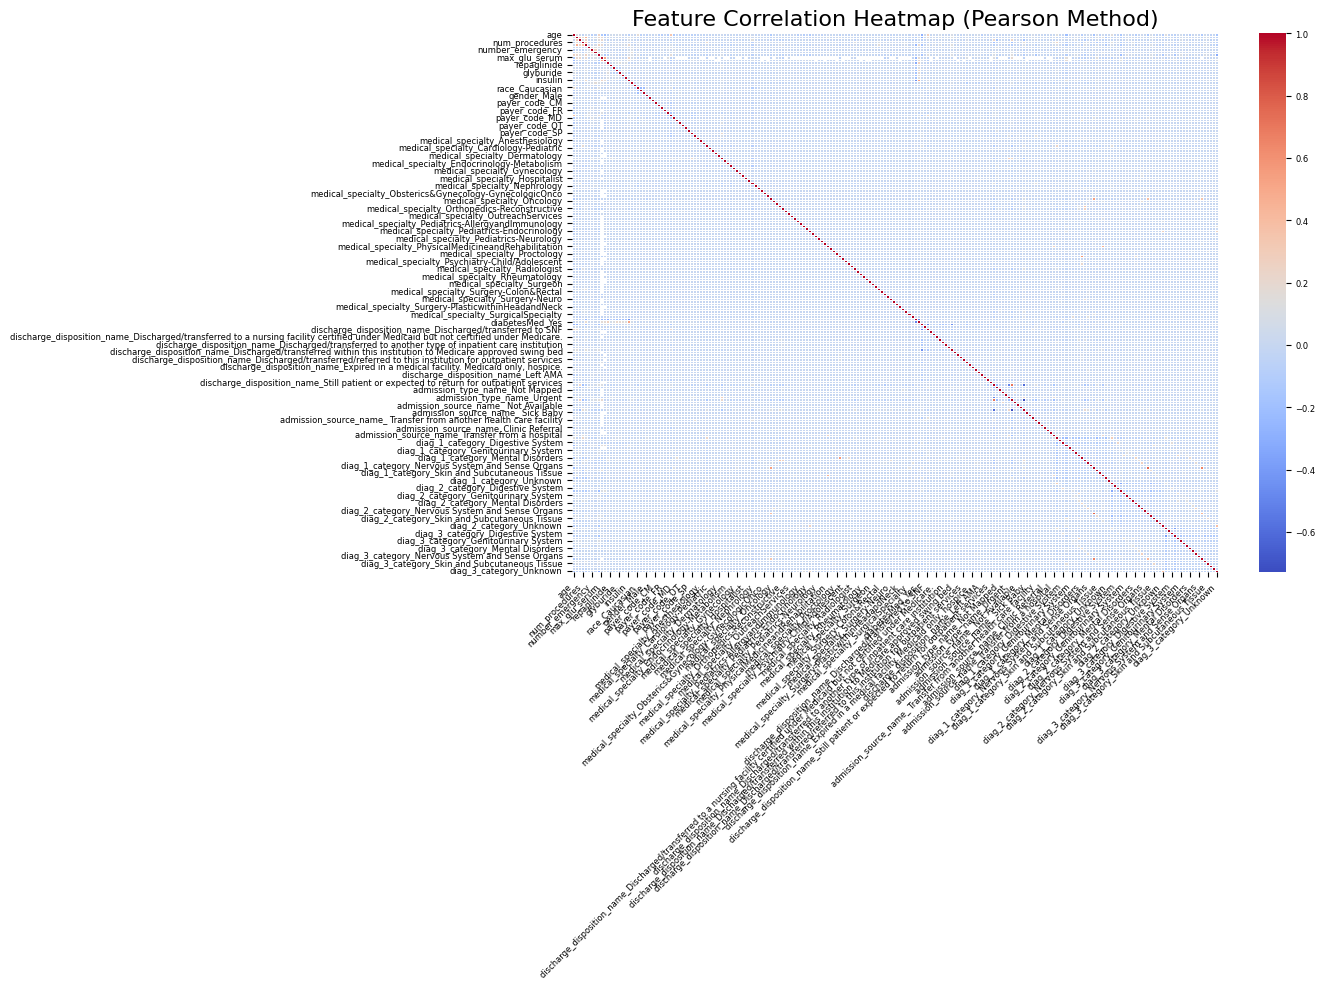

In [199]:
features_df = df.drop(columns=["encounter_id","patient_nbr","diag_1","diag_2","diag_3","discharge_disposition_id","admission_type_id","admission_source_id"])
plot_feature_heatmap_with_summary(df,features_df)

C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\843265684.py:47: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif selected_df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(selected_df[col]):
C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\843265684.py:47: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif selected_df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(selected_df[col]):



🔍 Feature pairs with |pearson correlation| ≥ 0.3:

• age ↔ payer_code_MC: 0.37
• time_in_hospital ↔ num_medications: 0.46
• num_procedures ↔ num_medications: 0.37
• max_glu_serum ↔ A1Cresult: 0.56
• insulin ↔ change_No: -0.46
• insulin ↔ diabetesMed_Yes: 0.52
• medical_specialty_Emergency/Trauma ↔ admission_type_name_Urgent: 0.35
• medical_specialty_ObstetricsandGynecology ↔ diag_1_category_Pregnancy and Childbirth: 0.57
• medical_specialty_ObstetricsandGynecology ↔ diag_2_category_Pregnancy and Childbirth: 0.45
• medical_specialty_ObstetricsandGynecology ↔ diag_3_category_Pregnancy and Childbirth: 0.34
• medical_specialty_Orthopedics ↔ diag_1_category_Musculoskeletal System: 0.33
• medical_specialty_PhysicalMedicineandRehabilitation ↔ admission_source_name_Transfer from a hospital: 0.39
• medical_specialty_PhysicalMedicineandRehabilitation ↔ diag_1_category_Supplementary Factors (V codes): 0.49
• medical_specialty_Psychiatry ↔ diag_1_category_Mental Disorders: 0.56
• change_No ↔ diab

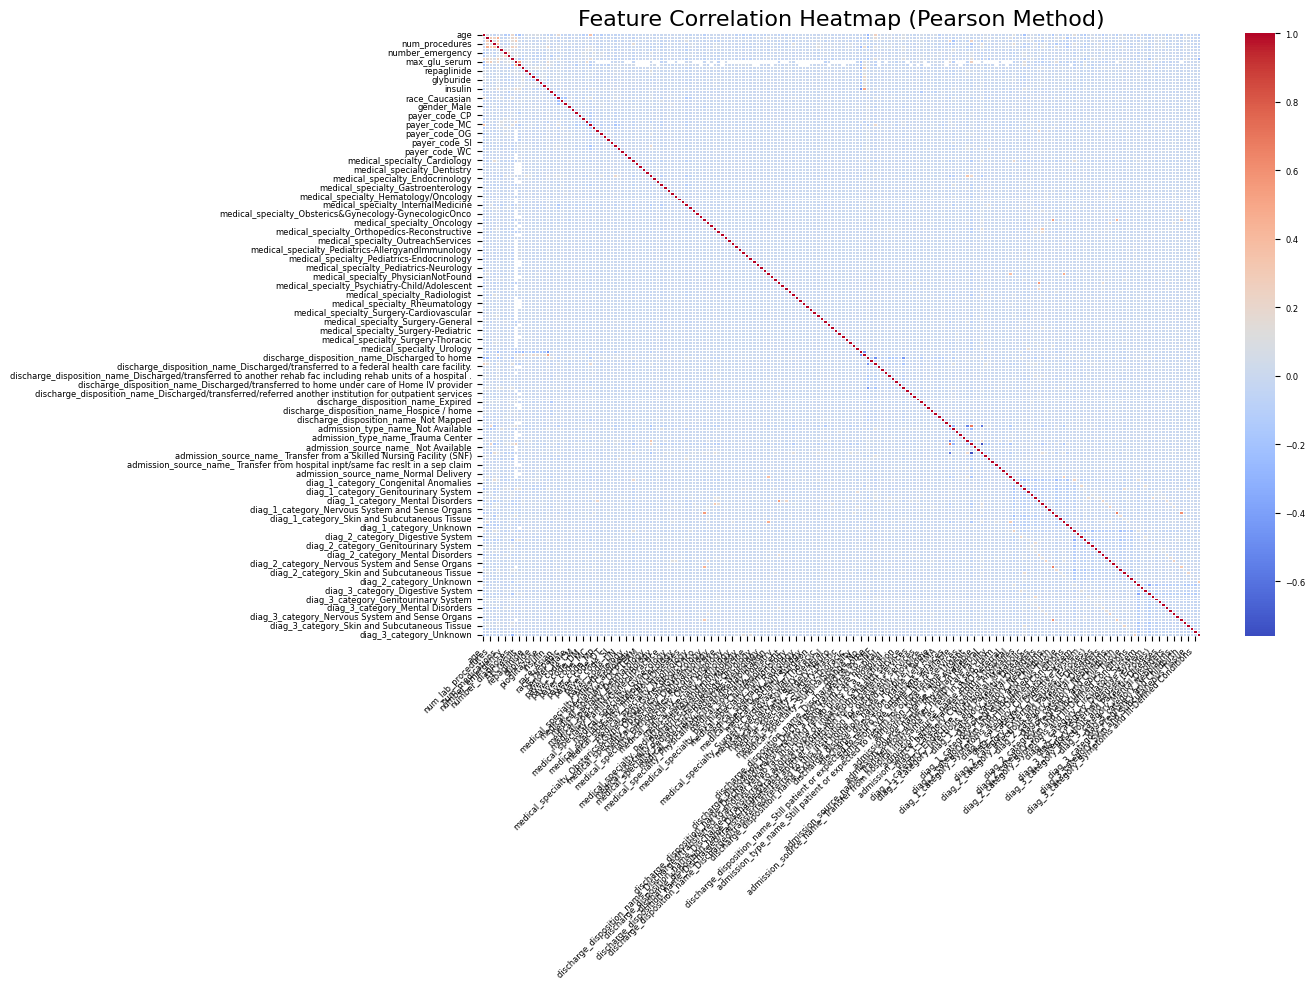

In [200]:
features_df = df_repeated.drop(columns=["encounter_id","patient_nbr","diag_1","diag_2","diag_3","discharge_disposition_id","admission_type_id","admission_source_id"])
plot_feature_heatmap_with_summary(df_repeated,features_df)

C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\843265684.py:47: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif selected_df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(selected_df[col]):
C:\Users\raiag\AppData\Local\Temp\ipykernel_59216\843265684.py:47: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  elif selected_df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(selected_df[col]):



🔍 Feature pairs with |pearson correlation| ≥ 0.3:

• age ↔ payer_code_MC: 0.34
• time_in_hospital ↔ num_lab_procedures: 0.33
• time_in_hospital ↔ num_medications: 0.47
• num_procedures ↔ num_medications: 0.40
• number_diagnoses ↔ diag_3_category_Unknown: -0.33
• max_glu_serum ↔ A1Cresult: 0.48
• metformin ↔ change_No: -0.35
• insulin ↔ change_No: -0.45
• insulin ↔ diabetesMed_Yes: 0.52
• medical_specialty_ObstetricsandGynecology ↔ diag_1_category_Pregnancy and Childbirth: 0.54
• medical_specialty_ObstetricsandGynecology ↔ diag_2_category_Pregnancy and Childbirth: 0.39
• medical_specialty_ObstetricsandGynecology ↔ diag_3_category_Pregnancy and Childbirth: 0.36
• medical_specialty_Orthopedics ↔ diag_1_category_Musculoskeletal System: 0.38
• medical_specialty_Orthopedics-Reconstructive ↔ diag_1_category_Musculoskeletal System: 0.30
• medical_specialty_Pediatrics-Endocrinology ↔ diag_2_category_Unknown: 0.30
• medical_specialty_PhysicalMedicineandRehabilitation ↔ diag_1_category_Supplemen

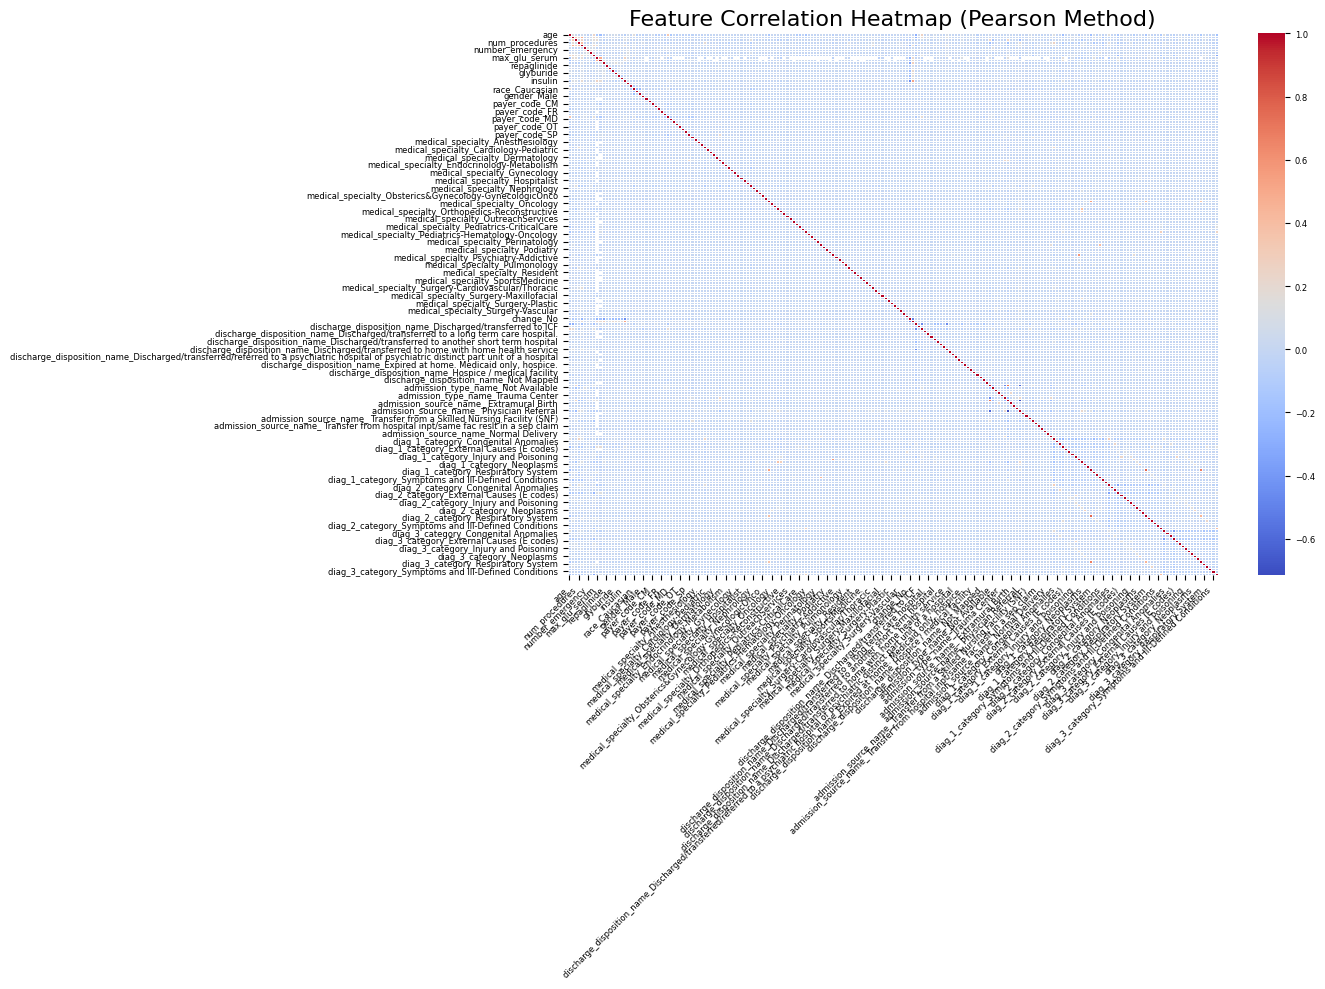

In [201]:
features_df = df_first_encounter.drop(columns=["encounter_id","patient_nbr","diag_1","diag_2","diag_3","discharge_disposition_id","admission_type_id","admission_source_id"])
plot_feature_heatmap_with_summary(df_first_encounter,features_df)

In [9]:
from ydata_profiling import ProfileReport

In [10]:
profile = ProfileReport(df,title="Diabetes Readmission Analysis")

In [11]:
profile.to_file("diabetes_readmission_latest.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:05<00:00,  9.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
profile_all = ProfileReport(df,title="Diabetes Readmission Analysis",correlations={
            "auto": {"calculate": True},
            "pearson": {"calculate": True},
            "spearman": {"calculate": True},
            "kendall": {"calculate": True},
            "phi_k": {"calculate": True},
            "cramers": {"calculate": True},
        },)

In [20]:
profile_all.to_file("diabetes_readmission_all_corr.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:16<00:00,  3.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---

### 🧼 4. **Data Cleaning & Preprocessing**
```markdown
## 🧼 Data Cleaning & Preprocessing

Steps include:
- Handling missing values
- Encoding categorical variables
- Normalizing numerical features
- Feature selection based on domain knowledge and correlation analysis